## 미션 04

- 포르투갈 은행의 마케팅 데이터를 분석하기!
- 결정 트리와 앙상블 기법을 사용하여 분류 모델을 구축하고, 마케팅 캠페인의 효율성을 높이는 전략 도출
- 데이터 2008 ~ 2010 은행 마케팅 캠페인 데이터
- 목표 : 고객이 정기 예금을 가입할 가능성을 예측하고, 이를 통해 마케팅 캠페인의 효율성을 높이는것
- 정기 예금과 관련이 있는 요소를 파악하고, 고객의 행동 이해하기 (어떤 상황에서 어떤 고객들이 정기 예금을 가입하는지 파악하기)
- 최종목표 :  가장 정확한 분류 모델을 개발하여 고객이 정기 예금을 가입할지 여부를 예측하고, 그 모델을 통해 도출한 인사이트를 바탕으로
              비즈니스 전략을 제시하는 것


### 예시 분석 질문

- 특정 직업군에서 정기 예금 가입률이 높은가요?
- 교육 수준에 따라 정기 예금 가입률이 달라지나요?
- 과거 마케팅 캠페인의 성공 여부가 현재 캠페인의 성공에 영향을 미치나요?
- 월별 정기 예금 가입률의 차이는 무엇인가요?
- 고객의 나이와 정기 예금 가입 여부 간의 관계는 무엇인가요?
- 정기 예금 가입을 예측하기 위해 사용할 수 있는 가장 중요한 변수는 무엇인가요?

In [ ]:
bank_df 를 train data와 test data로 나누어서 train 데이터를 통해 학습한 모델을 test 데이터에 적용시켜서 얼마나
정확도가 나오는지 확인 -> 정확도를 높이는 것이 목표

SyntaxError: invalid syntax (1811570215.py, line 1)

In [ ]:
# 데이터 가져오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import pandas as pd
pd.set_option('display.max_columns', None)  # 전체 컬럼 보이기
import matplotlib.font_manager as fm
from sklearn.metrics import accuracy_score
# 맑은 고딕 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

In [ ]:
bank_df = pd.read_csv('data/bank-additional-full2.csv', sep=";") # 열 구분자 -> ;

In [ ]:
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
bank_df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [ ]:
bank_df.shape[0]

41188

예상 정기 예금과 관련이 높을것 같은 컬럼 : default(신룡 불량 여부) , housing(주택 대출 여부) , loan(개인 대출 여부)
emp.var.rate(고용 변동률) , cons.price.idx(소비자 물가지수)

데이터를 통해 고객이 정기 예금을 가입할 가능성을 예측하고, 이를 통해 마케팅 캠페인의 효율성을 높이는 것입니다.
1. **마케팅 담당자로서 정기 예금과 관련이 있는 요소들을 파악** 해보고, **고객의 행동을 이해**해보세요. **어떤 상황에서 어떤 고객들이 정기 예금을 가입**할까요?

이번 미션의 최종 목표는 **가장 정확한 분류 모델을 개발하여 고객이 정기 예금을 가입할지 여부를 예측**하고, 그 모델을 통해 도출한 인사이트를 바탕으로 **비즈니스 전략을 제시**하는 것입니다.

- 이건 이번 캠페인에 이자료를 써먹을 경우
- 그럼 결국 목표는 y = no 인 데이터를 분류해서 이 고객들이 과연 이번 이벤트에 예금에 가입할 확률이 얼마나될지를 예측 / or Yes or no로 결과 예측
- 확률을 예측 하고 그 확률을 바탕으로 Yes/No를 정하는 방식을 해도 되고... Yes/No를 바로 도출해도 될것같다

## EDA(탐색적 데이터 분석)

데이터 전처리

In [ ]:
중복값 확인

SyntaxError: invalid syntax (854940064.py, line 1)

In [ ]:
bank_df.duplicated().sum()

12

In [ ]:
bank_df[bank_df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


- 완전히 모든 조건이 같은 사람이 겹치는 경우가 12건 존재한다고 볼수도 있겠지만 현실적인 확률은 매우 낮으므로 완전히 중복된 12개의 행 삭제

In [ ]:
bank_df = bank_df.drop_duplicates()

In [ ]:
bank_df.duplicated().sum()

0

In [ ]:
bank_df.shape[0]

41176

결측값 확인

In [ ]:
bank_df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

- 결측값은 없음

이상치 확인

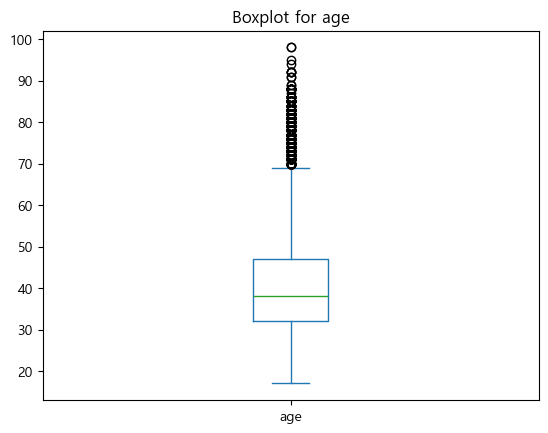

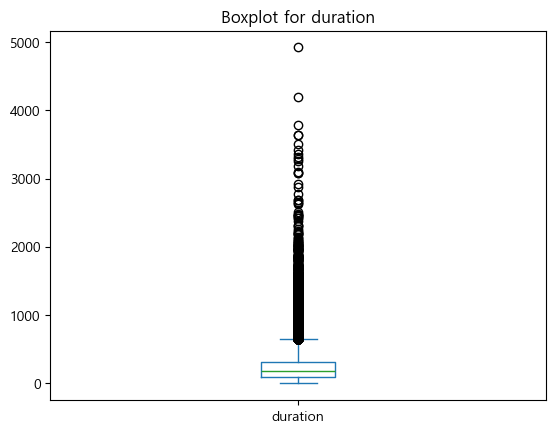

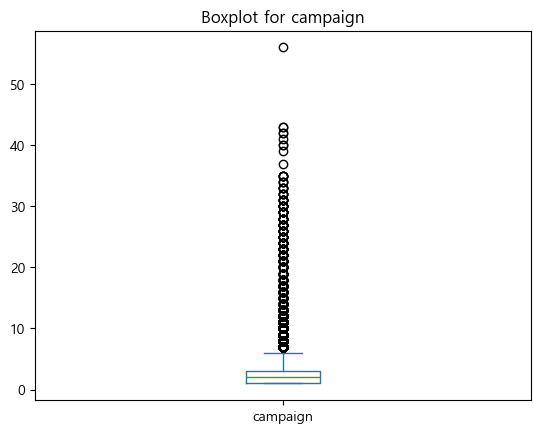

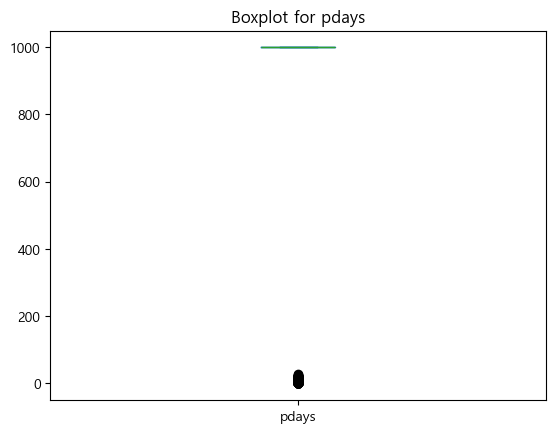

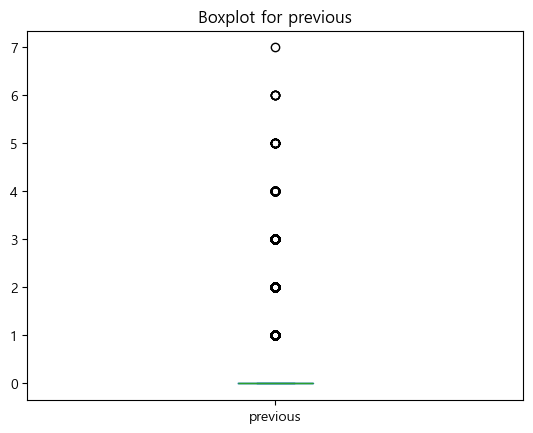

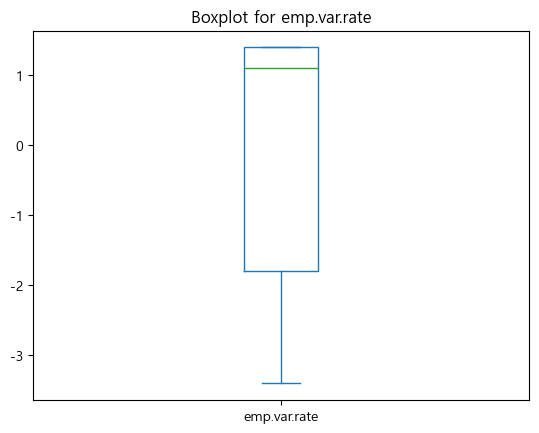

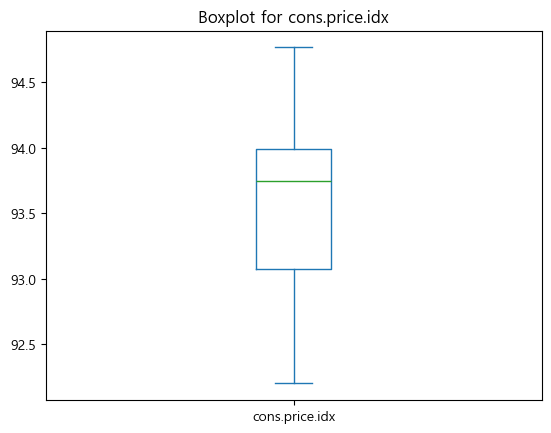

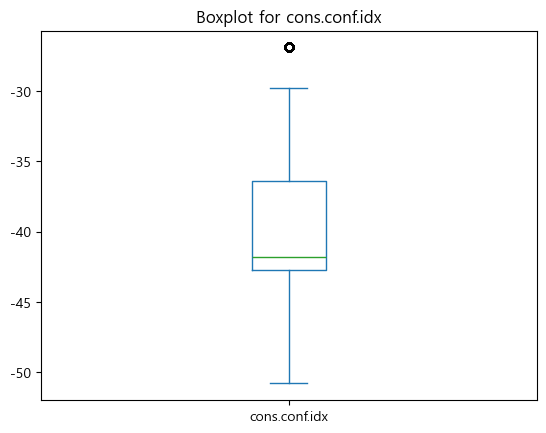

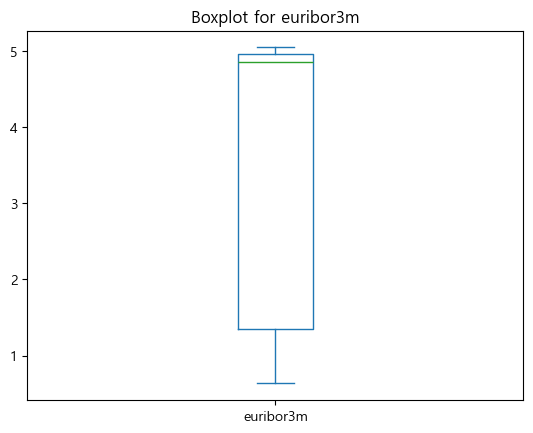

Error: ',nr.employed' - Ensure the column exists in the DataFrame.


<Figure size 640x480 with 0 Axes>

In [ ]:
# 수치형 컬럼 이상치 확인

def anomaly_distribution(df, columns):

    try:
        if isinstance(columns, list):
            for col in columns:
                plt.figure()
                df[col].plot.box()
                plt.title(f'Boxplot for {col}')
                plt.show()
        else:
            plt.figure()
            df[columns].plot.box()
            plt.title(f'Boxplot for {columns}')
            plt.show()
    except KeyError as e:
        print(f"Error: {e} - Ensure the column exists in the DataFrame.")
    except Exception as e:
        print(f"Unexpected error: {e}")


# 다중 열 박스플롯
anomaly_distribution(bank_df, ['age', 'duration', 'campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m',',nr.employed'])

이상치가 발견된 컬럼 age, duration, campaign, pdays, previous, cons.conf.idx

## age

In [ ]:
bank_df['age'].value_counts()

age
31    1947
32    1845
33    1833
36    1779
35    1758
      ... 
89       2
91       2
94       1
87       1
95       1
Name: count, Length: 78, dtype: int64

In [ ]:
# 이상치 데이터 확인

Q1 = bank_df['age'].quantile(0.25)
Q3 = bank_df['age'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (bank_df['age'] < Q1 - 1.5 * IQR) | (bank_df['age'] > Q3 + 1.5 * IQR)
outliers = bank_df[outlier_condition]
outliers

print(outliers.shape[0])
print(bank_df.shape[0])
print(outliers.shape[0]/bank_df.shape[0] * 100)

468
41176
1.1365844181076354


In [ ]:
Q3 + 1.5 * IQR

69.5

count =  468 , upper_limit = 69.5

In [ ]:
outliers['y'].value_counts()

y
no     247
yes    221
Name: count, dtype: int64

- 실제로 실존하는 데이터이고 , 이상치를 넘는 나이이신 분들의 평균 정기예끔 가입률이 47.2% 임
- **모델링에 유의미한 데이터일수 있음으로 이상치 삭제 X**

## duration - 마지막 연락 지속시간(단위 : 초)

이 속성은 출력 대상에 큰 영향력을 미칩니다. (예: 지속시간 = 0 이면 y="아니요"). 그러나 통화가 수행되기 전에는 지속 시간을 알 수 없습니다
또한 통화가 끝난 후에는 y를 분명히 알수 있습니다. 따라서 이 입력은 벤치마크 목적으로만 포함되어야 하며 현실적인 예측 모델을 가지려는 의도가 있는 경우 삭제해야 합니다

In [ ]:
# 이상치 데이터 확인

Q1 = bank_df['duration'].quantile(0.25)
Q3 = bank_df['duration'].quantile(0.75)
IQR = Q3 - Q1
print(f"upper_limit : {Q3 + 1.5 * IQR} ")
outlier_condition = (bank_df['duration'] < Q1 - 1.5 * IQR) | (bank_df['duration'] > Q3 + 1.5 * IQR)
outliers = bank_df[outlier_condition]
outliers

print(outliers.shape[0])
print(outliers.shape[0] / bank_df.shape[0] * 100)



upper_limit : 644.5 
2963
7.195939382164368


In [ ]:
outliers['duration'].value_counts()

duration
700     17
744     17
652     15
705     14
676     14
        ..
1275     1
1473     1
1432     1
1412     1
1868     1
Name: count, Length: 899, dtype: int64

In [ ]:
bank_df['y'].value_counts()

y
no     36537
yes     4639
Name: count, dtype: int64

In [ ]:
print(f"평균 정기 예금 가입률 : {4639/(36537+4639)*100} %")

평균 정기 예금 가입률 : 11.266271614532737 %


In [ ]:
outliers['y'].value_counts()

y
yes    1526
no     1437
Name: count, dtype: int64

In [ ]:
print(f"통화시간이 644.5초 초과인 사람들의 정기 예금 가입률 : {1526/(1526+1437)*100} %")

통화시간이 644.5초 초과인 사람들의 정기 예금 가입률 : 51.50185622679716 %


- 통화시간이 644.5초 초과인 사람들의 평균 정기 예끔 가입률은 무려 51%로 평균 정기 예금 가입률보다 40% 가량 높았다.
- **이는 정기 예금 가입률을 예측하는데 중요한 데이터가 될수 있기때문에 이상치를 삭제하지 않는다**

## campaign - “이번 캠페인 동안 이 고객과 연락한 횟수

현재 진행 중인 캠페인에서 해당 고객과 수행한 연락 횟수를 의미하며, 숫자 형태로 나타내고, 마지막 연락까지 포함한 값이다.

In [ ]:
bank_df['campaign'].value_counts().sort_index()

campaign
1     17634
2     10568
3      5340
4      2650
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
15       51
16       51
17       58
18       33
19       26
20       30
21       24
22       17
23       16
24       15
25        8
26        8
27       11
28        8
29       10
30        7
31        7
32        4
33        4
34        3
35        5
37        1
39        1
40        2
41        1
42        2
43        2
56        1
Name: count, dtype: int64

In [ ]:
# 이상치 데이터 확인

Q1 = bank_df['campaign'].quantile(0.25)
Q3 = bank_df['campaign'].quantile(0.75)
IQR = Q3 - Q1
print(f"upper_limit : {Q3 + 1.5 * IQR} ")
outlier_condition = (bank_df['campaign'] < Q1 - 1.5 * IQR) | (bank_df['campaign'] > Q3 + 1.5 * IQR)
outliers = bank_df[outlier_condition]
outliers.sort_values(by='campaign', ascending=False)
print(outliers.shape[0])
print(outliers.shape[0]/bank_df.shape[0]*100)

upper_limit : 6.0 
2406
5.8432096366815625


In [ ]:
outliers.shape[0]

2406

- 전체 데이터의 5.8%가 이상치

In [ ]:
outliers['campaign'].value_counts().sort_index()

campaign
7     629
8     400
9     283
10    225
11    177
12    125
13     92
14     69
15     51
16     51
17     58
18     33
19     26
20     30
21     24
22     17
23     16
24     15
25      8
26      8
27     11
28      8
29     10
30      7
31      7
32      4
33      4
34      3
35      5
37      1
39      1
40      2
41      1
42      2
43      2
56      1
Name: count, dtype: int64

In [ ]:
outliers['y'].value_counts()
print(f"연락횟수가 6회 초과인 사람의 정기 예금 가입률 : {111/(2295+111)*100} %")

연락횟수가 6회 초과인 사람의 정기 예금 가입률 : 4.613466334164588 %


- 캠페인 도중 연락을 6회 초과해서 한 경우가 이상치 이다  
- 너무 많이 연락 받은 사람들은 지쳤거나 이미 거절한 상태 -> 가입 가능성 매우 낮음
- 반복 연락 -> 오히려 가입률 ↓
- 한 캠페인 동안 연락 56번은 말이 안되는 수준
- **모델링에는 이상치를 삭제한다**

In [ ]:
bank_df[bank_df['campaign'] == 6]['y'].value_counts()

y
no     904
yes     75
Name: count, dtype: int64

In [ ]:
print(f"campaign = 6 의 평균 예금 가입률 : {75/(904+75)*100} %")

campaign = 6 의 평균 예금 가입률 : 7.6608784473953015 %


In [ ]:
bank_df = bank_df[bank_df['campaign'] <= 6]

In [ ]:
bank_df[bank_df['campaign'] > 6].shape

(0, 21)

## pdays - 이전 캠페인 중 마지막으로 고객과 연락한 이후로 경과한 일수

pdays: 이전 캠페인에서 클라이언트가 마지막으로 연락을 받은 후 경과한 일 수

pdays = 999 : 고객과 이전에 통화 한적이 없음

In [ ]:
bank_df['pdays'].value_counts()

pdays
999    37272
3        437
6        406
4        117
9         63
2         60
7         59
12        58
10        50
5         46
13        36
11        27
1         25
15        24
14        19
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

- pdays 의 수치들을 이용 하기 위해서는 고객이 이전에 마케팅 접촉 경험이 있는지 없는지 여부를 담고있는 컬럼을 만들어야 할것 같음
  ( 고객이 이전에 마케팅 접촉 경험이 있는지 여부 0: 없음 , 1 있음)

In [ ]:
bank_df['pdays_contacted'] = bank_df['pdays'].apply(lambda x: 0 if x == 999 else 1)

- 그리고 pdays의 정보를 분석용으로 사용할때는 999의 정보는 제외하고 다룸
- bank_df[bank_df['pdays'] != 999]['pdays'].describe() (실제 과거 캠페인 반응 시점이 중요한 분석에서만 사용)

In [ ]:
contacted_df = bank_df[bank_df['pdays'] != 999]

In [ ]:
contacted_df['y'].value_counts()

y
yes    965
no     533
Name: count, dtype: int64

In [ ]:
print(f"이전 마케팅 접촉 경험이 있는 고객들의 정기 예금 가입률 = {967/(967+548)*100} %")

이전 마케팅 접촉 경험이 있는 고객들의 정기 예금 가입률 = 63.82838283828383 %


- 이전에 마케팅 접촉 경험이 있는 고객들의 정기 예금 가입률이 평균보다 50% 이상 높다
- 즉 그래도 이전에 전화를 받은적이 있는 고객이 상품에 가입할 확률이 높다
- 캠페인 타겟팅	과거 캠페인 반응자에게 우선 연락
-  // 세그먼트 구분	기존 마케팅 반응자 vs 신규 고객 분리해서 분석 //

- 마케팅 첩족이 있는 데이터들 중에서 pdays의 이상치 확인

<Axes: >

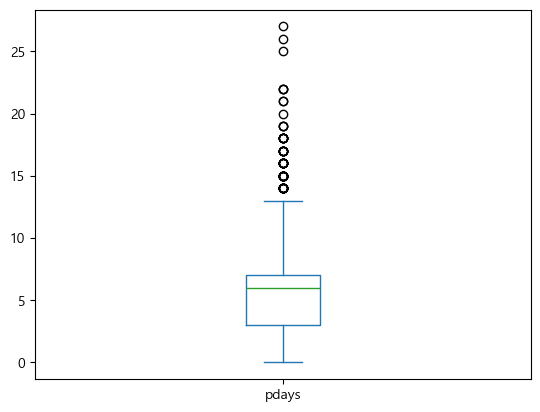

In [ ]:
contacted_df['pdays'].plot(kind='box')

In [ ]:
# 이상치 데이터 확인

Q1 = contacted_df['pdays'].quantile(0.25)
Q3 = contacted_df['pdays'].quantile(0.75)
IQR = Q3 - Q1
print(f"upper_limit : {Q3 + 1.5 * IQR} ")
outlier_condition = (contacted_df['pdays'] < Q1 - 1.5 * IQR) | (contacted_df['pdays'] > Q3 + 1.5 * IQR)
outliers = contacted_df[outlier_condition]
outliers.sort_values(by='pdays', ascending=False)

upper_limit : 13.0 


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_contacted
40874,41,technician,married,professional.course,no,no,no,cellular,oct,wed,391,2,27,1,success,-1.1,94.601,-49.5,0.959,4963.6,yes,1
40243,24,technician,married,professional.course,no,no,no,cellular,jul,fri,192,4,26,1,success,-1.7,94.215,-40.3,0.885,4991.6,yes,1
40234,60,admin.,married,basic.9y,no,no,no,cellular,jul,thu,174,2,25,2,failure,-1.7,94.215,-40.3,0.884,4991.6,yes,1
40668,38,technician,single,professional.course,no,yes,no,cellular,sep,thu,284,3,22,1,success,-1.1,94.199,-37.5,0.879,4963.6,yes,1
40489,30,admin.,single,high.school,no,no,no,telephone,aug,thu,18,1,22,1,success,-1.7,94.027,-38.3,0.899,4991.6,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39690,63,retired,married,professional.course,no,yes,yes,cellular,may,mon,444,2,14,1,success,-1.8,93.876,-40.0,0.685,5008.7,yes,1
36989,35,admin.,single,high.school,no,yes,no,cellular,jul,fri,147,2,14,2,failure,-2.9,92.469,-33.6,1.059,5076.2,no,1
37927,44,admin.,married,university.degree,no,yes,no,cellular,sep,thu,259,1,14,1,success,-3.4,92.379,-29.8,0.809,5017.5,no,1
39340,30,student,single,unknown,no,no,no,cellular,mar,thu,101,1,14,1,success,-1.8,93.369,-34.8,0.635,5008.7,yes,1


In [ ]:
outliers['y'].value_counts()

y
yes    47
no     34
Name: count, dtype: int64

- 이전 마케팅 접촉 경험이 있는 사람들중 경과시간을 기준으로 한 이상치 들에서 특별히 이상한 점을 찾을수 없었다.
- 마케팅 접촉 후 27일뒤 연락 -> 충분히 가능성 있음
- **이상치 처리 하지 않음**
- 그런데 pdays가 0일수 있을까? 이전 마케팅에서 전화 받고 0일이 지났다 / 전화를 받은지 아직 하루가 지나지 않았다

In [ ]:
bank_df[bank_df['pdays'] == 0]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_contacted
25497,31,unemployed,single,professional.course,no,yes,no,cellular,nov,wed,192,1,0,1,success,-0.1,93.200,-42.0,4.120,5195.8,no,1
25996,35,management,married,university.degree,no,yes,yes,telephone,nov,wed,377,3,0,2,success,-0.1,93.200,-42.0,4.120,5195.8,no,1
30238,51,technician,married,professional.course,no,yes,no,cellular,apr,thu,687,1,0,1,success,-1.8,93.075,-47.1,1.365,5099.1,yes,1
30314,36,admin.,married,university.degree,no,yes,no,cellular,apr,thu,483,1,0,1,success,-1.8,93.075,-47.1,1.365,5099.1,yes,1
30417,30,admin.,single,university.degree,no,yes,no,cellular,apr,thu,502,1,0,1,success,-1.8,93.075,-47.1,1.365,5099.1,yes,1
30688,35,blue-collar,married,basic.6y,unknown,yes,no,cellular,may,tue,214,1,0,1,success,-1.8,92.893,-46.2,1.344,5099.1,no,1
40360,48,admin.,married,university.degree,no,yes,yes,cellular,aug,wed,288,1,0,3,success,-1.7,94.027,-38.3,0.900,4991.6,yes,1
40364,27,student,single,university.degree,no,yes,no,cellular,aug,wed,651,1,0,3,success,-1.7,94.027,-38.3,0.900,4991.6,yes,1
40365,28,student,single,basic.9y,no,yes,no,cellular,aug,wed,178,1,0,1,success,-1.7,94.027,-38.3,0.900,4991.6,yes,1
40376,27,student,single,university.degree,no,yes,no,telephone,aug,wed,153,1,0,5,success,-1.7,94.027,-38.3,0.900,4991.6,no,1


- pdays = 0 인 데이터의 특징 : poutcome이 다 success 이다 / 즉 이전 캠페인에서 마케팅 성공을 했던 사람들
- 지난 캠페인에 가입을 했더라도 이번캠페인에도 가입이 가능한것 같음

In [ ]:
bank_df[bank_df['pdays'] == 0].shape[0]

15

## previous - 이전 캠페인 동안 고객과의 연락 횟수
number of contacts performed before this campaign and for this client

In [ ]:
bank_df['previous'].value_counts()

previous
0    33250
1     4470
2      742
3      215
4       70
5       17
6        5
7        1
Name: count, dtype: int64

- 이전에 연락이 되지 않은 고객이 대다수

In [ ]:
# 이상치 데이터 확인

Q1 = bank_df['previous'].quantile(0.25)
Q3 = bank_df['previous'].quantile(0.75)
IQR = Q3 - Q1
print(f"upper_limit : {Q3 + 1.5 * IQR} ")
outlier_condition = (bank_df['previous'] < Q1 - 1.5 * IQR) | (bank_df['previous'] > Q3 + 1.5 * IQR)
outliers = bank_df[outlier_condition]
outliers
print(outliers.shape[0])
print(outliers.shape[0]/bank_df.shape[0]*100)

upper_limit : 0.0 
5520
14.237812741810679


- **실존할수 있는 데이터로 보이기 때문에 이상치 처리하지 않는다**

## cons.conf.idx - 소비자 신뢰지수 (숫자)

In [ ]:
bank_df['cons.conf.idx'].value_counts()

cons.conf.idx
-36.4    7363
-42.7    6014
-46.2    5536
-36.1    4730
-41.8    3903
-42.0    3548
-47.1    2427
-31.4     766
-40.8     709
-26.9     446
-30.1     351
-40.3     302
-37.5     298
-50.0     267
-29.8     264
-34.8     260
-39.8     229
-38.3     228
-40.0     210
-49.5     203
-33.6     173
-34.6     170
-33.0     168
-50.8     128
-40.4      67
-45.9      10
Name: count, dtype: int64

이 데이터셋은 2008~2010년 금융위기 시기의 자료
→ 당시엔 소비 심리가 전체적으로 위축된 상태
→ 그래서 전반적으로 cons.conf.idx가 음수

높은 값 → 소비자들이 경제에 대해 자신감이 있음

“앞으로 괜찮아질 거야”, “소비해도 돼”

낮은 값 (특히 음수) → 소비자들이 불안해하고 있음

“지금 돈 쓰면 위험해”, “경제 안 좋아질 것 같아”

In [ ]:
# 이상치 데이터 확인

Q1 = bank_df['cons.conf.idx'].quantile(0.25)
Q3 = bank_df['cons.conf.idx'].quantile(0.75)
IQR = Q3 - Q1
print(f"upper_limit : {Q3 + 1.5 * IQR} ")
outlier_condition = (bank_df['cons.conf.idx'] < Q1 - 1.5 * IQR) | (bank_df['cons.conf.idx'] > Q3 + 1.5 * IQR)
outliers = bank_df[outlier_condition]
outliers
print(outliers.shape[0])
print(outliers.shape[0]/bank_df.shape[0]*100)

upper_limit : -26.949999999999992 
446
1.1503740005158627


In [ ]:
outliers['cons.conf.idx'].value_counts()

cons.conf.idx
-26.9    446
Name: count, dtype: int64

- -26.9    446의 데이터는 upper_limit과 차이가 크지 않은 실제 데이터일 가능성이 커보임
-  **이상치를 삭제하지 않음**

정기 예금과 관련이 있는 요소들을 파악 및 고객의 행동을 이해 하기위해 우선적으로 수치형 컬럼과 y와의 연관 관계 확인

y 컬럼 매핑을통한 1과 0값으로 변환

In [ ]:
bank_df['y'] = bank_df['y'].map({'yes': 1, 'no': 0})

In [ ]:
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_contacted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0


y                 1.000000
duration          0.399077
previous          0.231972
cons.conf.idx     0.056783
age               0.030323
campaign         -0.048159
cons.price.idx   -0.134693
emp.var.rate     -0.300790
euribor3m        -0.311100
pdays            -0.329245
nr.employed      -0.358826
Name: y, dtype: float64


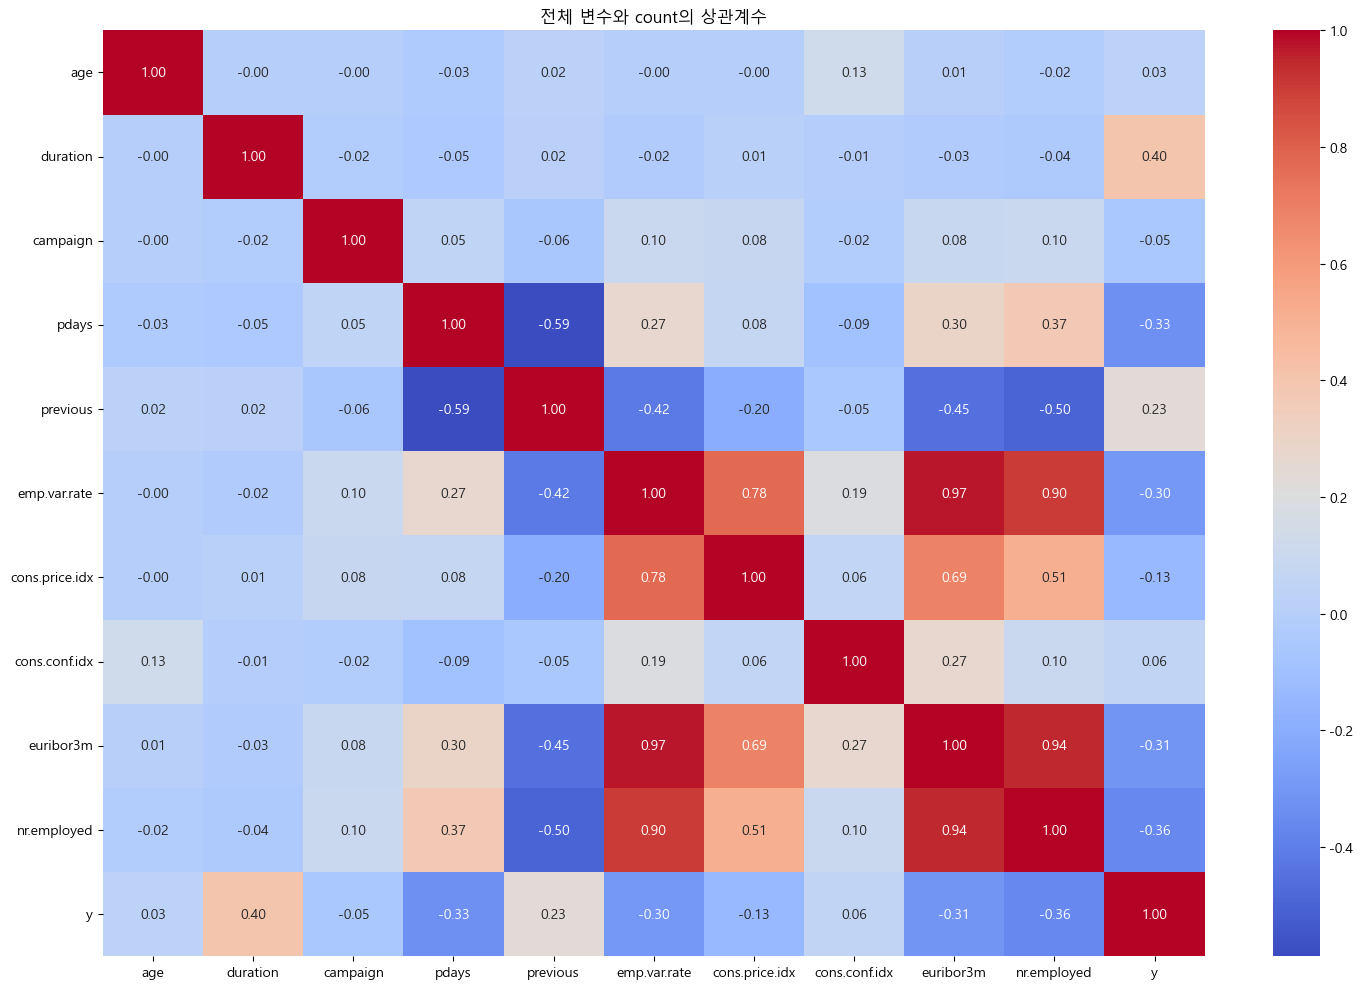

In [ ]:
# 히트맵

# 수치형 변수부터 골라서 상관 관계 계산
columns = [
    'age', 'duration', 'campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','y'
]

# 상관계수 계산
correlation = bank_df[columns].corr()

# count와의 상관계수만 보기
count_corr = correlation['y'].sort_values(ascending=False)
print(count_corr)

plt.figure(figsize=(15, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("전체 변수와 count의 상관계수")
plt.tight_layout()
plt.show()

duration(0.41) > nr.employed(-0.35) >  pdays(-0.33) > euribor3m(-0.31) > emp.var.rate(-0.30) > previous(0.23) > cons.price.idx(-0.14) > campaign(-0.07) > cons.con.fi.dx(0.05) > age (0.03)

연관 계수가 높은 컬럼부터 탐색

## duration(0.41)

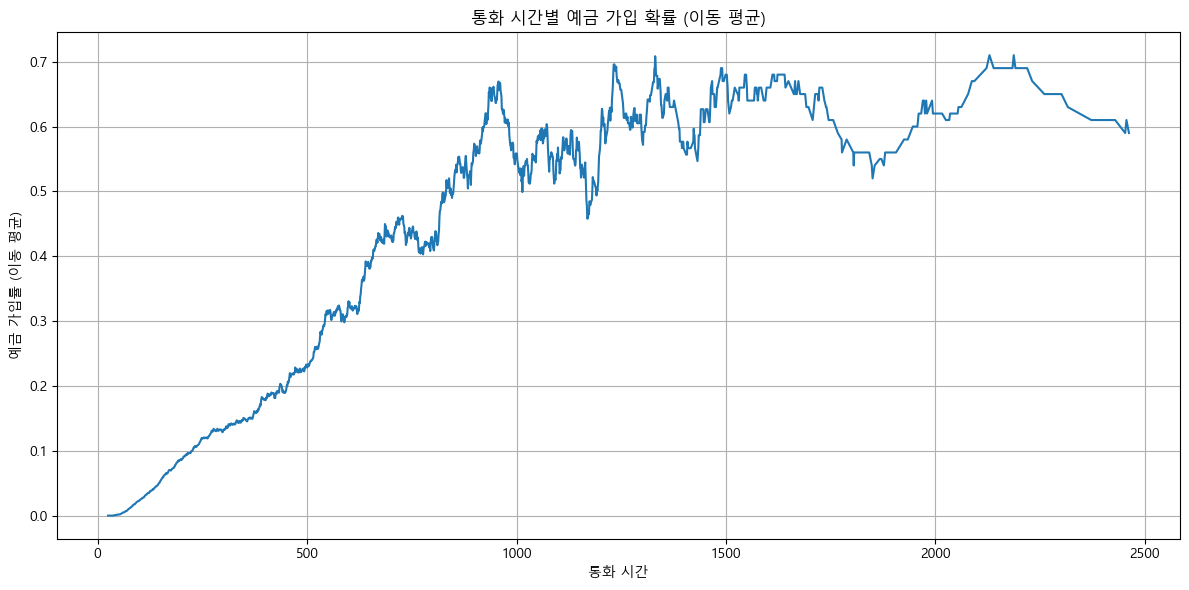

In [ ]:
grouped = bank_df.groupby('duration')['y'].mean().reset_index()
grouped['y_smooth'] = grouped['y'].rolling(window=50, center=True).mean()

plt.figure(figsize=(12,6))
plt.plot(grouped['duration'], grouped['y_smooth'])
plt.xlabel('통화 시간')
plt.ylabel('예금 가입률 (이동 평균)')
plt.title('통화 시간별 예금 가입 확률 (이동 평균)')
plt.grid(True)
plt.tight_layout()
plt.show()

- duration 값에 비례해서 예금 가입률이 올라간다

## nr.employed(-0.35)
- 분기별 고용자 수를 나타내는 지표

In [ ]:
bank_df['nr.employed'].value_counts()

nr.employed
5228.1    14647
5099.1     8230
5191.0     7363
5195.8     3615
5076.2     1648
5017.5     1061
4991.6      759
5008.7      640
4963.6      629
5023.5      168
5176.3       10
Name: count, dtype: int64

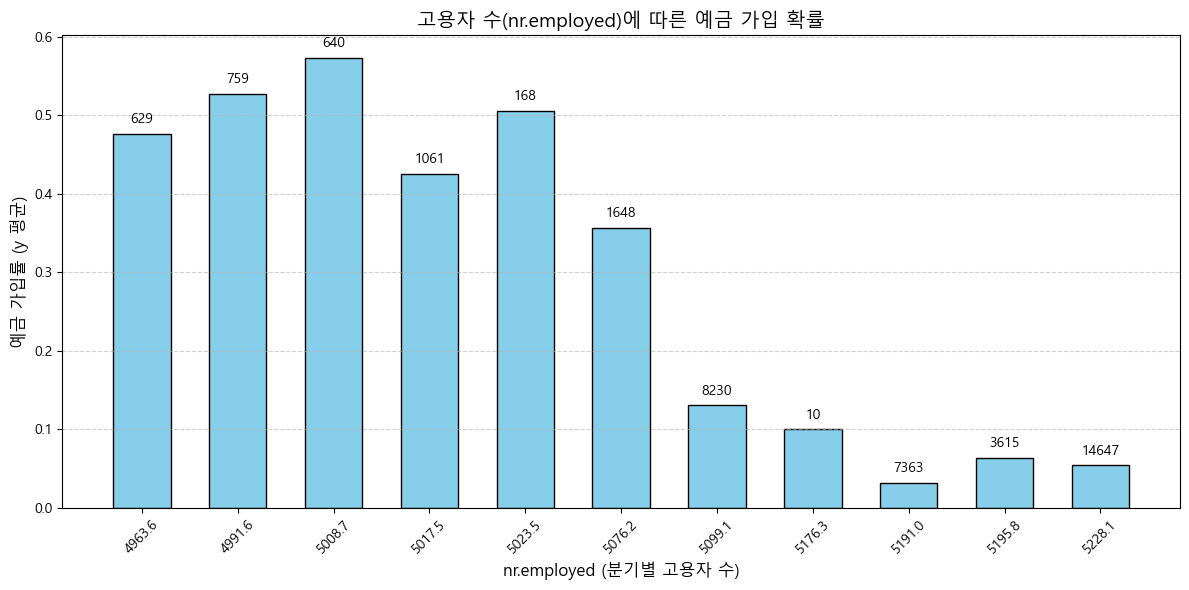

In [ ]:
# 평균과 count 함께 계산
employed_grouped = bank_df.groupby('nr.employed')['y'].agg(['mean', 'count']).reset_index()

# 시각화
plt.figure(figsize=(12, 6))
bars = plt.bar(employed_grouped['nr.employed'].astype(str), employed_grouped['mean'], width=0.6, color='skyblue', edgecolor='black')

# 라벨 및 제목
plt.xlabel('nr.employed (분기별 고용자 수)', fontsize=12)
plt.ylabel('예금 가입률 (y 평균)', fontsize=12)
plt.title('고용자 수(nr.employed)에 따른 예금 가입 확률', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# 막대 위에 count 표시
for bar, count in zip(bars, employed_grouped['count']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{count}', ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

- 분기별 고용자 수가 낮을 때 예금 가입률이 높고 , 고용자 수가 높을때 예금 가입률이 낮음

## pdays

In [ ]:
contacted_df = bank_df[bank_df['pdays'] != 999]

-0.03569950788815322

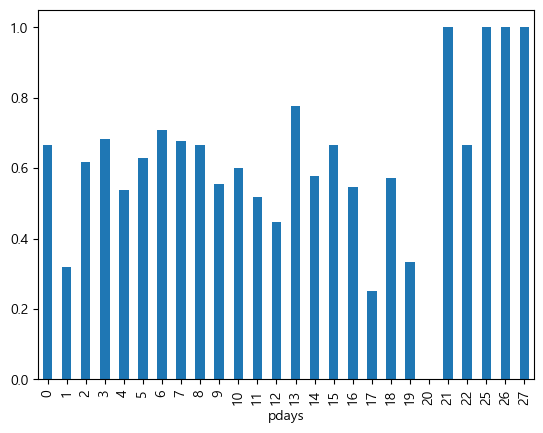

In [ ]:
contacted_group = contacted_df.groupby('pdays')['y'].mean()
contacted_group.plot(kind='bar')
contacted_df['pdays'].corr(contacted_df['y'])

- 999를 제외한 데이터와 y와의 상관 관계는 낮다

## euribor3m(-0.31)
**유로존(Eurozone)의 3개월 만기 유로 은행 간 금리(EURIBOR)**를 나타내는 지표예요.
매일 발표되는 금리 수치이며, 이 값이 높을수록 시중 금리가 높다는 뜻입니다.

In [ ]:
bank_df['euribor3m'].value_counts()

euribor3m
4.857    2756
4.962    2299
4.963    2284
4.961    1729
4.856    1159
         ... 
0.956       1
1.574       1
3.329       1
3.282       1
3.901       1
Name: count, Length: 316, dtype: int64

C:\Users\82104\AppData\Local\Temp\ipykernel_13012\1723432432.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = bank_df.groupby(euribor_bins)['y'].agg(['mean', 'count']).reset_index()
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


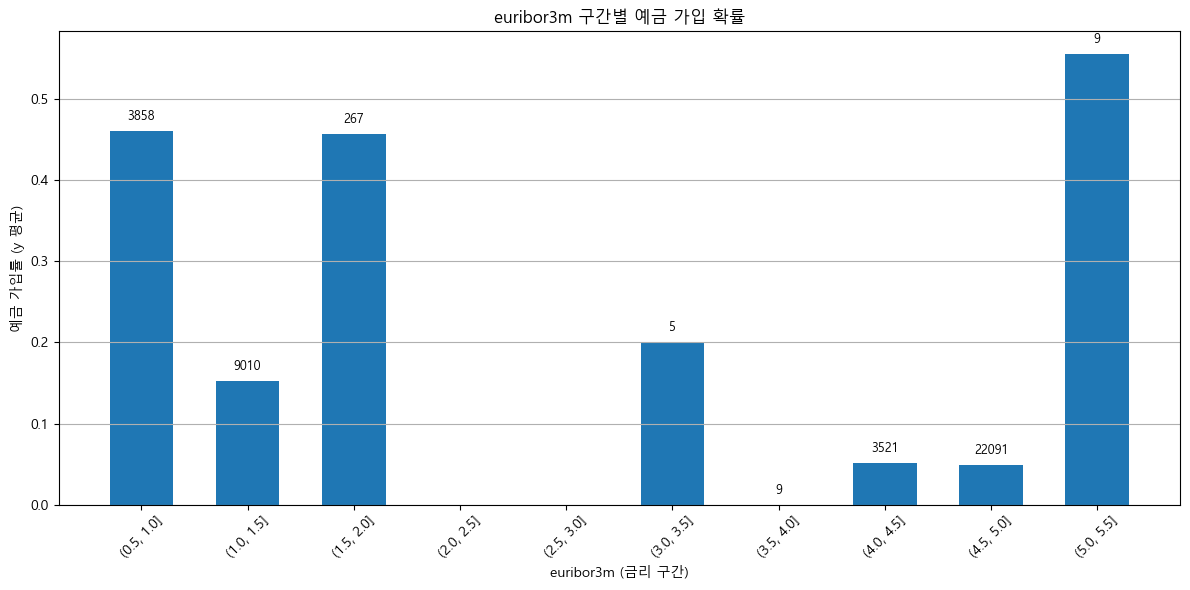

In [ ]:

# 구간 나누기
euribor_bins = pd.cut(bank_df['euribor3m'], bins=[0,0.5, 1,1.5, 2,2.5, 3 ,3.5, 4, 4.5, 5, 5.5, 6])

# 평균과 count 함께 계산
grouped = bank_df.groupby(euribor_bins)['y'].agg(['mean', 'count']).reset_index()

# 시각화
plt.figure(figsize=(12, 6))
bars = plt.bar(grouped['euribor3m'].astype(str), grouped['mean'], width=0.6)

# x축, y축 라벨
plt.xlabel('euribor3m (금리 구간)')
plt.ylabel('예금 가입률 (y 평균)')
plt.title('euribor3m 구간별 예금 가입 확률')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# 막대 위에 count 표시
for bar, count in zip(bars, grouped['count']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{count}', ha='center', va='bottom', fontsize=9)

plt.show()

- 금리가 높을수록 예금할 확률이 떨어진다

## emp.var.rate(-0.30)
고용 변화율을 나타내는 분기별 지표
전 분기 대비 고용자 수가 얼마나 증가 또는 감소 했는지를 퍼센트로 나타낸 값

In [ ]:
bank_df['emp.var.rate'].value_counts()

emp.var.rate
 1.4    14647
-1.8     8870
 1.1     7363
-0.1     3615
-2.9     1648
-3.4     1061
-1.7      759
-1.1      629
-3.0      168
-0.2       10
Name: count, dtype: int64

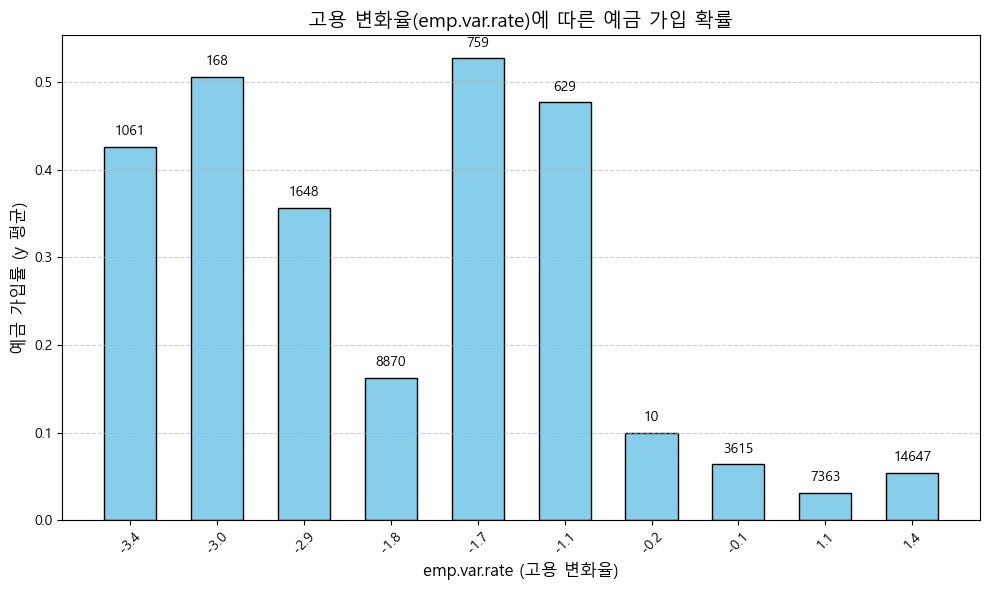

In [ ]:
# 평균과 count 함께 계산
evr_grouped = bank_df.groupby('emp.var.rate')['y'].agg(['mean', 'count']).reset_index()

# 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(evr_grouped['emp.var.rate'].astype(str), evr_grouped['mean'], width=0.6, color='skyblue', edgecolor='black')

# 라벨, 제목
plt.xlabel('emp.var.rate (고용 변화율)', fontsize=12)
plt.ylabel('예금 가입률 (y 평균)', fontsize=12)
plt.title('고용 변화율(emp.var.rate)에 따른 예금 가입 확률', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# 막대 위에 count 숫자 표시
for bar, count in zip(bars, evr_grouped['count']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{count}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

- 고용 변화율이 떨어질수록 (고용 감소, 경기 침체) 예금 가입률은 높아진다

##  previous(0.23)

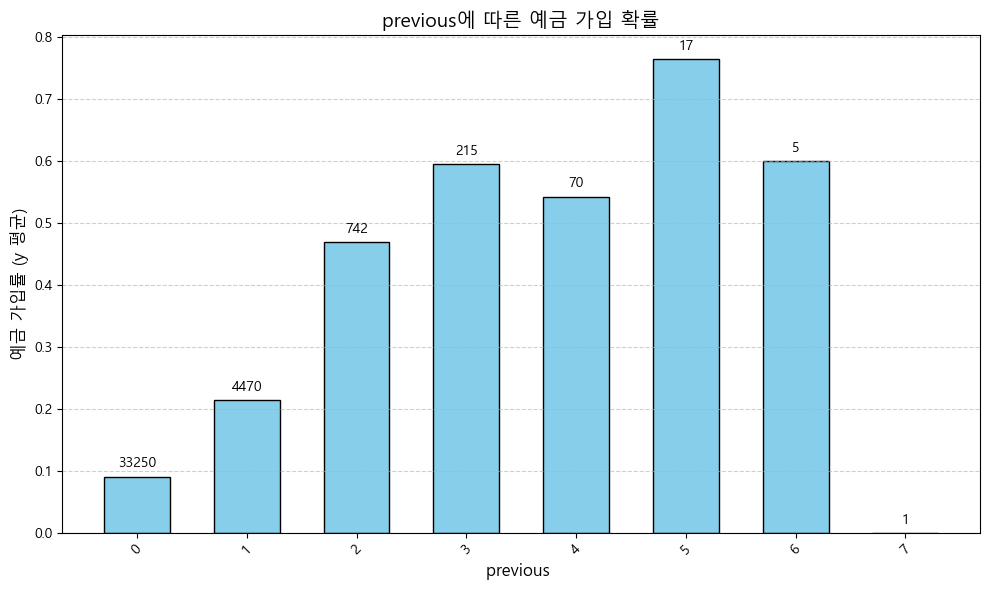

In [ ]:
# 평균과 count 함께 계산
previous_grouped = bank_df.groupby('previous')['y'].agg(['mean', 'count']).reset_index()

# 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(previous_grouped['previous'].astype(str), previous_grouped['mean'], width=0.6, color='skyblue', edgecolor='black')

# 라벨, 제목
plt.xlabel('previous ', fontsize=12)
plt.ylabel('예금 가입률 (y 평균)', fontsize=12)
plt.title('previous에 따른 예금 가입 확률', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# 막대 위에 count 숫자 표시
for bar, count in zip(bars, previous_grouped['count']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{count}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

- 이전에 고객과 한 통화 횟수와 예금 가입률은 정비례 한다

## cons.price.idx(-0.14)
cons.price.idx는 **소비자 물가 지수(CPI: Consumer Price Index)**를 나타내는 월간 지표입니다.
즉, 해당 시점의 물가 수준을 보여주는 숫자예요.

In [ ]:
bank_df['cons.price.idx'].value_counts()

cons.price.idx
93.994    7363
93.918    6014
92.893    5536
93.444    4730
94.465    3903
93.200    3548
93.075    2427
92.201     766
92.963     709
92.431     446
92.649     351
94.215     302
94.199     298
92.843     267
92.379     264
93.369     260
94.055     229
94.027     228
93.876     210
94.601     203
92.469     173
93.749     170
92.713     168
94.767     128
93.798      67
92.756      10
Name: count, dtype: int64

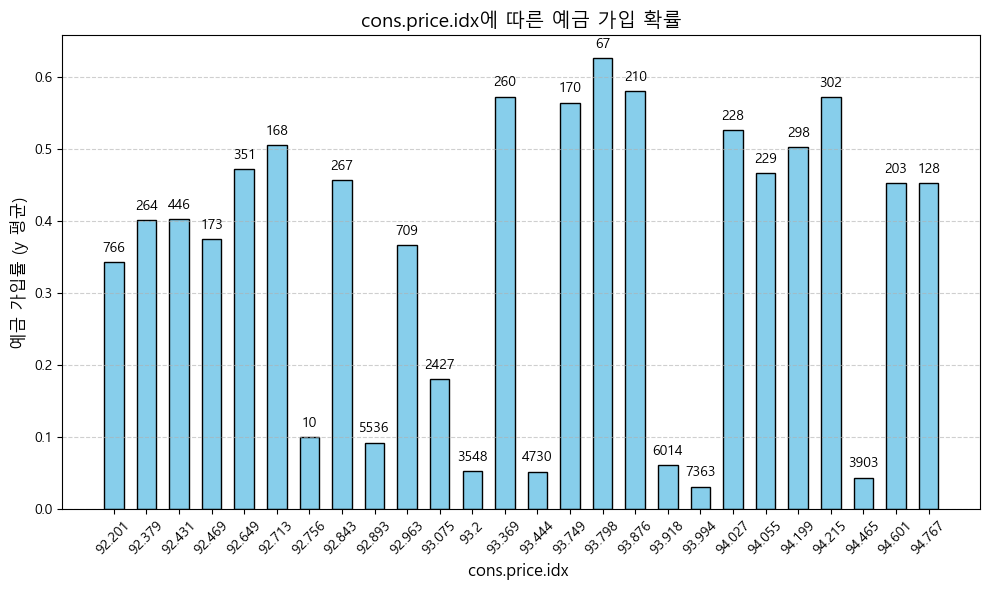

In [ ]:
# 평균과 count 함께 계산
price_grouped = bank_df.groupby('cons.price.idx')['y'].agg(['mean', 'count']).reset_index()

# 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(price_grouped['cons.price.idx'].astype(str), price_grouped['mean'], width=0.6, color='skyblue', edgecolor='black')

# 라벨, 제목
plt.xlabel('cons.price.idx ', fontsize=12)
plt.ylabel('예금 가입률 (y 평균)', fontsize=12)
plt.title('cons.price.idx에 따른 예금 가입 확률', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# 막대 위에 count 숫자 표시
for bar, count in zip(bars, price_grouped['count']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{count}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

- 물가와 예금 가입률은 약한 반비례 한다

## campaign(-0.07)

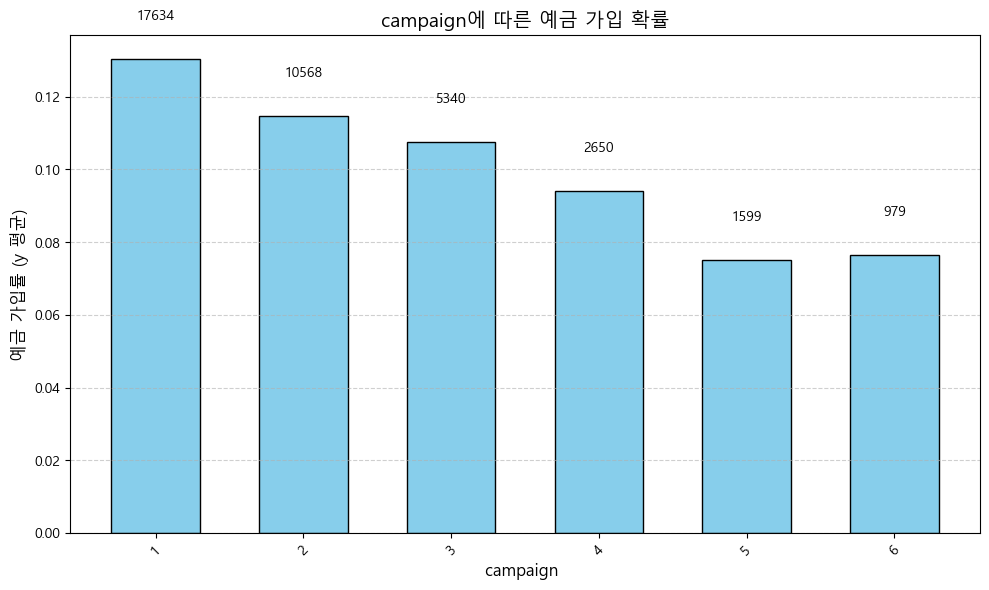

In [ ]:
# 평균과 count 함께 계산
campaign_grouped = bank_df.groupby('campaign')['y'].agg(['mean', 'count']).reset_index()

# 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(campaign_grouped['campaign'].astype(str), campaign_grouped['mean'], width=0.6, color='skyblue', edgecolor='black')

# 라벨, 제목
plt.xlabel('campaign ', fontsize=12)
plt.ylabel('예금 가입률 (y 평균)', fontsize=12)
plt.title('campaign에 따른 예금 가입 확률', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# 막대 위에 count 숫자 표시
for bar, count in zip(bars, campaign_grouped['count']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{count}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
filtered_df = bank_df[bank_df['campaign'] <= 6]

이상치 제거후 상관 계수-0.048158811578623326


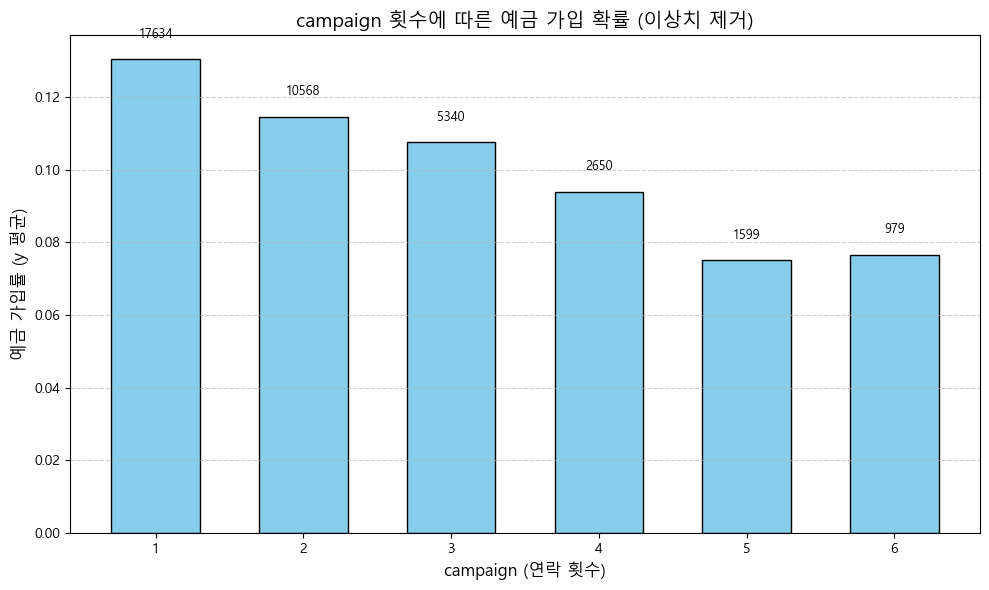

In [ ]:
campaign_grouped = filtered_df.groupby('campaign')['y'].agg(['mean', 'count']).reset_index()

# 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(campaign_grouped['campaign'].astype(str), campaign_grouped['mean'],
               width=0.6, color='skyblue', edgecolor='black')

# 축 라벨 및 제목
plt.xlabel('campaign (연락 횟수)', fontsize=12)
plt.ylabel('예금 가입률 (y 평균)', fontsize=12)
plt.title('campaign 횟수에 따른 예금 가입 확률 (이상치 제거)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=0)

# 막대 위에 count 표시
for bar, count in zip(bars, campaign_grouped['count']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.005, f'{count}', ha='center', va='bottom', fontsize=9)

print(f"이상치 제거후 상관 계수{filtered_df['campaign'].corr(filtered_df['y'])}")

plt.tight_layout()
plt.show()

- 연락횟수가 늘어남에 따라 예금가입률이 떨어지긴하지만 감소폭이 크지 않음

## age (0.03)

C:\Users\82104\AppData\Local\Temp\ipykernel_9304\839436455.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_grouped_df = bank_df.groupby('age_group')['y'].agg(['mean', 'count']).reset_index()
C:\Users\82104\AppData\Local\Temp\ipykernel_9304\839436455.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='age_group', y='mean', data=age_grouped_df, palette='Blues_d')


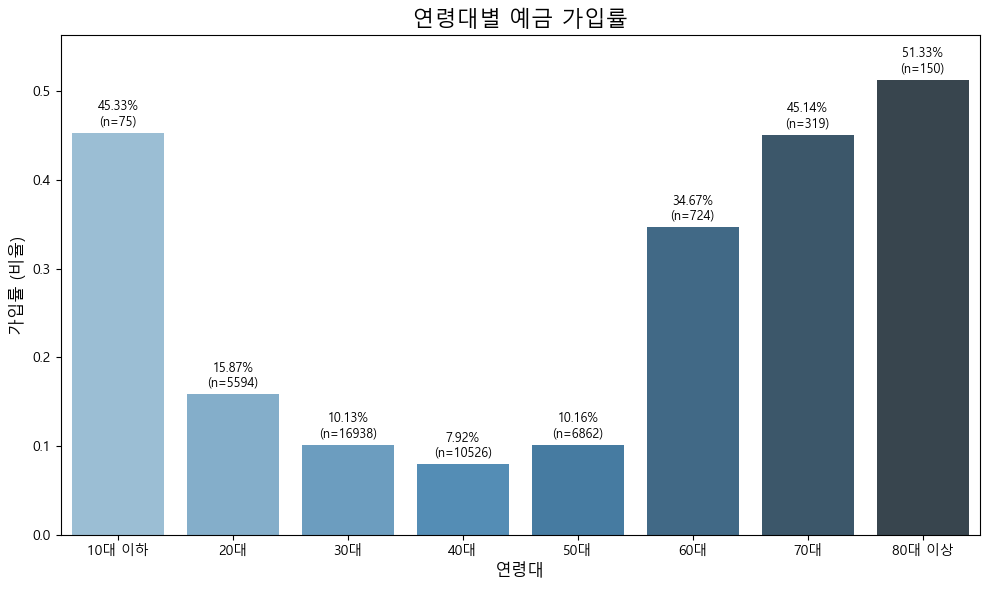

In [ ]:
# 나이 구간 설정
bins = [0, 19, 29, 39, 49, 59, 69, 79, 100]
labels = ['10대 이하', '20대', '30대', '40대', '50대', '60대', '70대', '80대 이상']

# 나이 구간 생성
bank_df['age_group'] = pd.cut(bank_df['age'], bins=bins, labels=labels, right=True)

# y 평균과 count 모두 계산
age_grouped_df = bank_df.groupby('age_group')['y'].agg(['mean', 'count']).reset_index()

# 시각화
plt.figure(figsize=(10, 6))
bars = sns.barplot(x='age_group', y='mean', data=age_grouped_df, palette='Blues_d')

plt.title("연령대별 예금 가입률", fontsize=16)
plt.xlabel("연령대", fontsize=12)
plt.ylabel("가입률 (비율)", fontsize=12)
plt.ylim(0, age_grouped_df['mean'].max() + 0.05)

# 막대 위에 가입률 + count 함께 표시
for i, (value, count) in enumerate(zip(age_grouped_df['mean'], age_grouped_df['count'])):
    plt.text(i, value + 0.005,
             f"{value:.2%}\n(n={count})",
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## cons.conf.idx
	소비자 물가지수 (숫자)

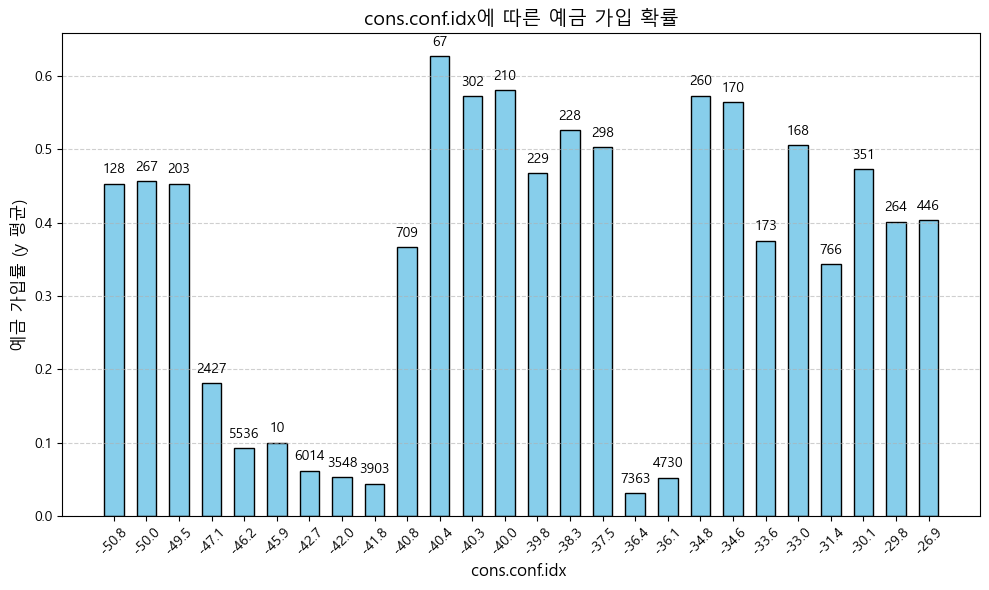

In [ ]:
# 평균과 count 함께 계산
conf_grouped = bank_df.groupby('cons.conf.idx')['y'].agg(['mean', 'count']).reset_index()

# 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(conf_grouped['cons.conf.idx'].astype(str), conf_grouped['mean'], width=0.6, color='skyblue', edgecolor='black')

# 라벨, 제목
plt.xlabel('cons.conf.idx ', fontsize=12)
plt.ylabel('예금 가입률 (y 평균)', fontsize=12)
plt.title('cons.conf.idx에 따른 예금 가입 확률', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# 막대 위에 count 숫자 표시
for bar, count in zip(bars, conf_grouped['count']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{count}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

- 40대 까지는 나이가 들수록 예금 가입률이 떨어지는 모습을 보이다가 50대부터 나이가 들수록 예금률이 올라간다

## 범주형 변수
 'job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'

## job
admin : 사무직 / blue-collar : 생산직 / technician : 기술자 / management : 관리자 / retired: 은퇴자 / entrepreneur : 기업가
self-employed : 자영업자 / housemaid : 가사도우미 / unemployed : 실업자

C:\Users\82104\AppData\Local\Temp\ipykernel_9304\2610036899.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='job', y='mean', data=job_grouped_df, palette='Blues_d')


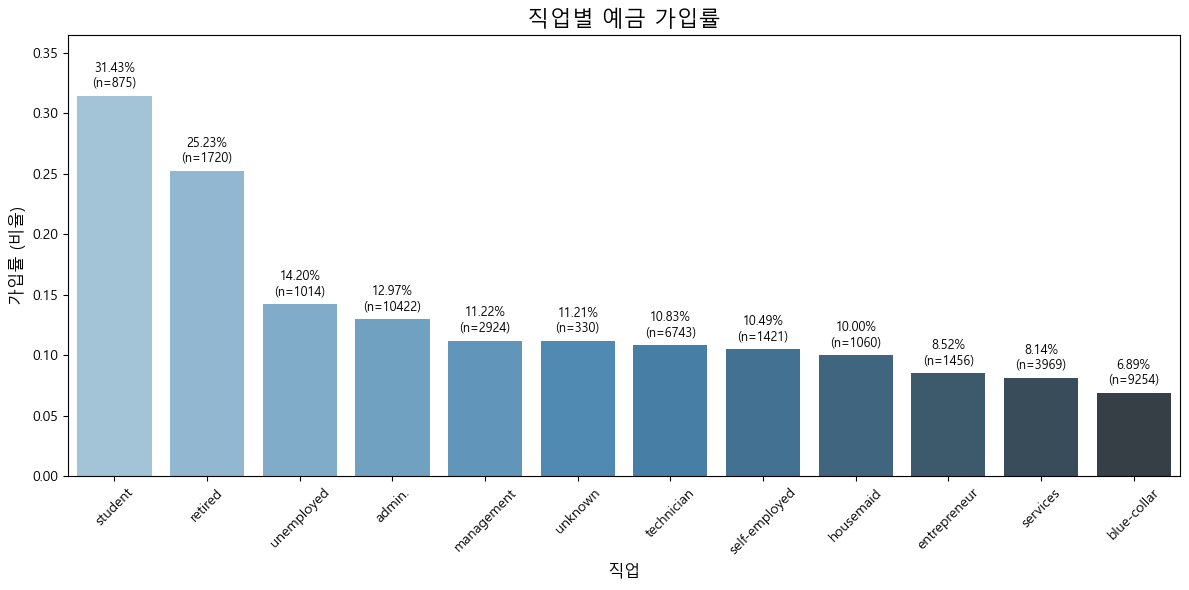

In [ ]:
# 직업별 예금 가입률과 count 계산
job_grouped_df = bank_df.groupby('job')['y'].agg(['mean', 'count']).sort_values(by='mean', ascending=False).reset_index()

# 시각화
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='job', y='mean', data=job_grouped_df, palette='Blues_d')

# 막대 위에 가입률 + count 표시
for i, (value, count) in enumerate(zip(job_grouped_df['mean'], job_grouped_df['count'])):
    plt.text(i, value + 0.005,
             f"{value:.2%}\n(n={count})",
             ha='center', va='bottom', fontsize=9)

# 제목과 라벨
plt.title("직업별 예금 가입률", fontsize=16)
plt.xlabel("직업", fontsize=12)
plt.ylabel("가입률 (비율)", fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, job_grouped_df['mean'].max() + 0.05)

plt.tight_layout()
plt.show()

- unknown 데이터의 평균 예금 가입률은 평균과 비슷하기 때문에 unknown 데이터 삭제

In [ ]:
bank_df = bank_df[bank_df['job'] != 'unknown']

In [ ]:
bank_df['y'].mean()

0.11677730053364571

In [ ]:
bank_df.shape[0]

38770

- 전체 평균 예금 가입률 보다 높은 직업 : student > retired > unemployed > admin> management
- 전체 평균 예금 가입률 보다 낮은 직업 : technician > self-employed > housemaid > entrepreneur > services > blue-collar
- 고정적인 수입이 없는 학생의 경우 상당히 높은 예금 가입률을 기록했다 -> 부모나 학교 프로그램등을 통한 가입이 많지 않을까 생각
- 다음은 퇴직자가 예금 가입률이 높았는데 퇴직금 등의 돈을 예금을 가입해서 관리하기때문에 높지 않을까 생각이 들었다.
- 다음은 실직자가 가입률이 높았는데 의외의 결과이긴 했지만 상대적으로 전화 마케팅을 받을 여유가 상대적으로 많을수 있겠다는 생각이 들었다.
- 수입이 없는 경우 예금 가입률이 높게 나타났다. 그리고 수입이 있는 사람들중 사무직 > 관리자 > 기술자 > 자영업자 > 가사도우미 > 기업가 > 서비스직 > 현장직
  순으로 예금 가입률이 높았다
- 실직자 퇴사자 등을 대상으로 한 연락이 효과적일수있다
- 학생의 경우 어머니이 권유나 주변의 권유로 가입하는 경우가 상당히 많을것으로 예상됨
- 서비스직 > 현장직 의 경우 일하면서 전화통화가 어려운 원인이 있을수 있음
- services와 blue-collar 직업군은 예금 가입률이 가장 낮은 그룹이지만,
동시에 데이터 수가 많아서 이들의 행동을 변화시키는 전략이 매우 중요
- services와 blue-colla -> 출퇴근시간이나 근무 요일이 일정하지 않는 특징이 있음
- 이에 맞는 연락 전략이 필요

- 또는 고객 스스로 희망 시간 등록 | 응답률 상승, 거부감↓
| 📆 주말/공휴일 연락 확대 |

평일 대비 주말 응답률이 더 높을 가능성

주말 오전 or 일요일 저녁 등 테스트 | 바쁜 평일 피하고 집중도 높은 시간 활용
| 📱 문자/카카오톡 사전 알림 후 전화 |

"OO은행입니다. 15분 뒤 연락드릴게요"

비응답률 ↓, 사전 인지 ↑ | 준비된 고객 → 반응률↑
| ⏳ 짧고 명확한 1분 제안 스크립트 |

길게 설명 NO, "3개월 이자 1.5%, 가입 간편" 같은 요약 중심 | 바쁜 근무자 시간 존중 + 핵심 전달
| 📊 과거 성공 응답 시간 로그 분석 |

contact 성공 시간, y=1 발생 시각 분석해

해당 직업군의 반응률 높은 시간대 파악 → ML 모델에도 활용 가능 | 데이터 기반 콜타임 최적화

##  marital

In [ ]:
bank_df['marital'].value_counts()

marital
married     24694
single      11494
divorced     4599
unknown        71
Name: count, dtype: int64

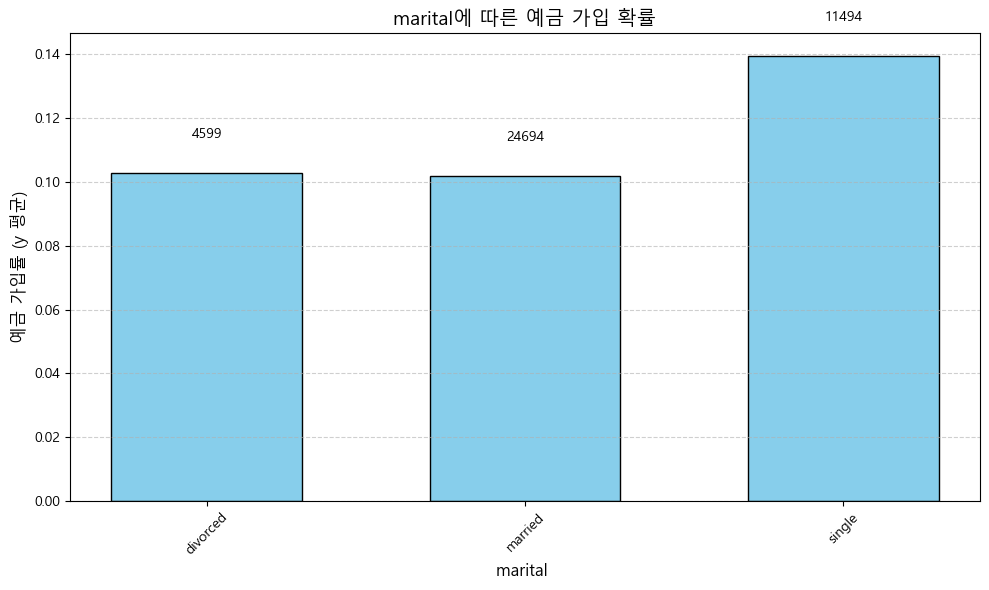

In [ ]:
# 평균과 count 함께 계산
marital_grouped = bank_df.groupby('marital')['y'].agg(['mean', 'count']).reset_index()

# 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(marital_grouped['marital'].astype(str), marital_grouped['mean'], width=0.6, color='skyblue', edgecolor='black')

# 라벨, 제목
plt.xlabel('marital ', fontsize=12)
plt.ylabel('예금 가입률 (y 평균)', fontsize=12)
plt.title('marital에 따른 예금 가입 확률', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# 막대 위에 count 숫자 표시
for bar, count in zip(bars, marital_grouped['count']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{count}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

- unknown 삭제

In [ ]:
bank_df = bank_df[bank_df['marital'] != 'unknown']

In [ ]:
bank_df[bank_df['marital'] == 'unknown']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_contacted,euribor3m_bin,age_group


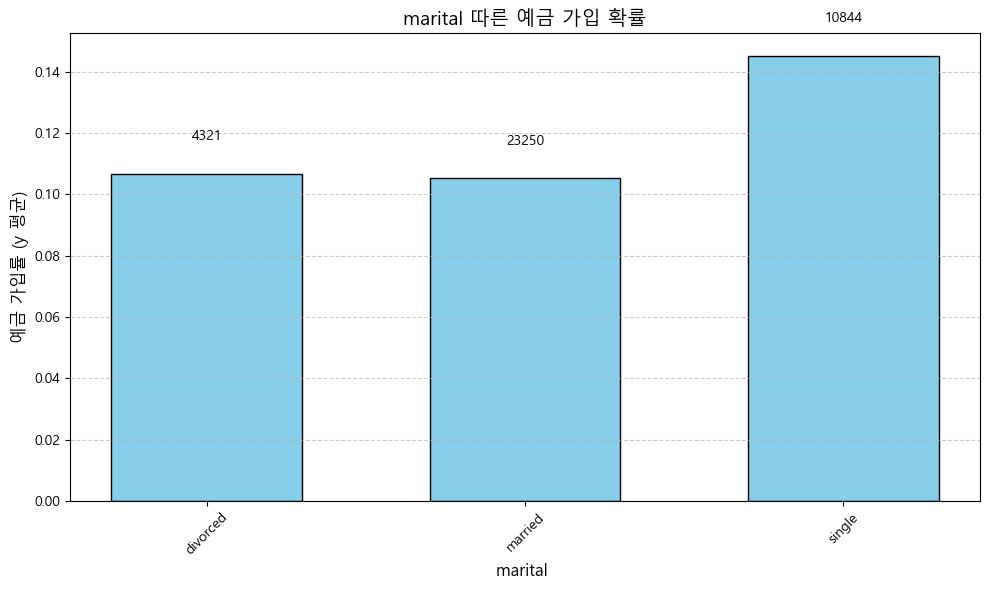

In [ ]:
# 평균과 count 함께 계산
marital_grouped = bank_df.groupby('marital')['y'].agg(['mean', 'count']).reset_index()

# 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(marital_grouped['marital'].astype(str), marital_grouped['mean'], width=0.6, color='skyblue', edgecolor='black')

# 라벨, 제목
plt.xlabel('marital ', fontsize=12)
plt.ylabel('예금 가입률 (y 평균)', fontsize=12)
plt.title('marital 따른 예금 가입 확률', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# 막대 위에 count 숫자 표시
for bar, count in zip(bars, marital_grouped['count']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{count}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

✅ 주요 인사이트
미혼(single) 고객의 예금 가입률이 가장 높습니다

약 **13.9%**로, 기혼자나 이혼자보다 약 3%포인트 이상 높음

자기 결정권이 높고, 소비보다 저축에 관심 있는 미혼 고객층의 특성이 반영됐을 수 있음

**기혼(married)**과 이혼(divorced) 고객은 가입률이 거의 비슷함 (~10%)

가족 단위 소비 지출이 많고, 예금 여력이 부족하거나

예금 상품보다 **다른 금융 수단(대출 등)**에 더 관심이 있을 수 있음

데이터 수는 기혼자가 압도적으로 많음 (24,694명)

가입률은 낮지만 전체 예금 마케팅 성과에 영향을 크게 줄 수 있는 집단

## education
university.degree : 대학 학위 이상 / high.school : 고등학교 졸업 / basic.9y / 초등~중학교 9년 교육 이수
professional.course	: 전문 교육 과정 이수 (직업학교 등 기술직/서비스업 계열) / basic.4y : 초등학교 수준 (4년 이수)
basic.6y : 초등학교 6년 이수 / illiterate : 문맹

In [ ]:
bank_df.shape[0]

38770

C:\Users\82104\AppData\Local\Temp\ipykernel_9304\3752384222.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='education', y='mean', data=edu_grouped_df, palette='Blues_d')


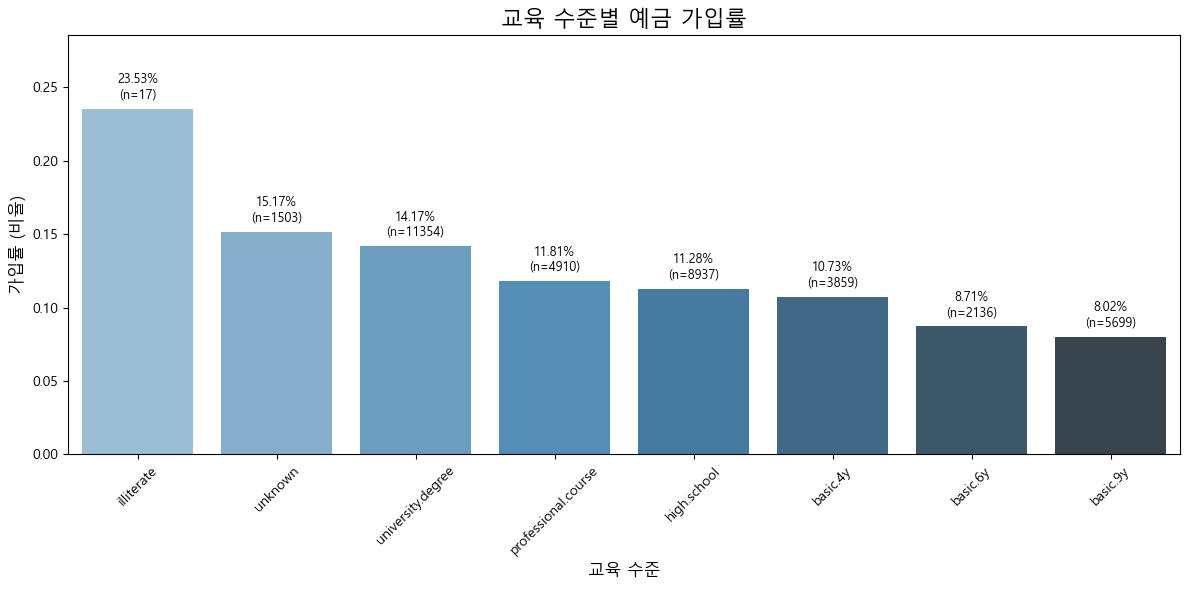

In [ ]:
# 교육 수준별 평균 가입률 + count 계산
edu_grouped_df = bank_df.groupby('education')['y'].agg(['mean', 'count']).sort_values(by='mean', ascending=False).reset_index()

# 시각화
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='education', y='mean', data=edu_grouped_df, palette='Blues_d')

# 막대 위에 가입률 + count 표시
for i, (value, count) in enumerate(zip(edu_grouped_df['mean'], edu_grouped_df['count'])):
    plt.text(i, value + 0.005,
             f"{value:.2%}\n(n={count})",
             ha='center', va='bottom', fontsize=9)

# 제목과 라벨
plt.title("교육 수준별 예금 가입률", fontsize=16)
plt.xlabel("교육 수준", fontsize=12)
plt.ylabel("가입률 (비율)", fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, edu_grouped_df['mean'].max() + 0.05)

plt.tight_layout()
plt.show()


- 문맹인 사람들이 가장 높은 예금 가입률을 보여주었으나 모집단의 데이터수(18)가 현저히 낮기에 예외의 경우로 생각한다
- 직업을 밝히지 않은 데이터는 1599건으로 전체 데이터중 3.9% 비율을 차지한다
- 다음으로 대학 학위이상 > 전문대 졸업 > 고등학교 졸업 > 초등4 > 초등 6> 중학교 졸업 의 예금 가입률을 보여주었고 마지막에 초등4 / 초등6 / 중졸 부분에서
  조금 상이하다 생각할순 있으나 초등4 / 초등6 / 중졸 분류를 교육수준이 낮은 분류 하나로 생각했을때 교육 수준이 높을수록 예금 가입률도 올라간다고 볼수 있다
- 이는 교육 수준이 높을 수록 금융 상품의 구조와 이자율 비교, 리스크 판단 등에 이점이 있기때문에 가입률이 높은것으로 예상된다.
- 문맹의 경우는 데이터의 수가 적기때문에 과적합 문제나 모델의 복잡도가 너무 높을경우 삭제하는 방향으로 간다
- 교육수준이 낮은 사람들이 전체의 ~~% 차지
- 반면 교육수준이 낮을수록 가입률이 떨어지므로 교육수준이 낮으신분들을 대상으로 더잘 이해할수있게 하는 전략을 써야함
- unknown은 삭제하지 않는다

## default - 신용 불량 여부

In [ ]:
bank_df['default'].value_counts()

default
no         32348
unknown     8436
yes            3
Name: count, dtype: int64

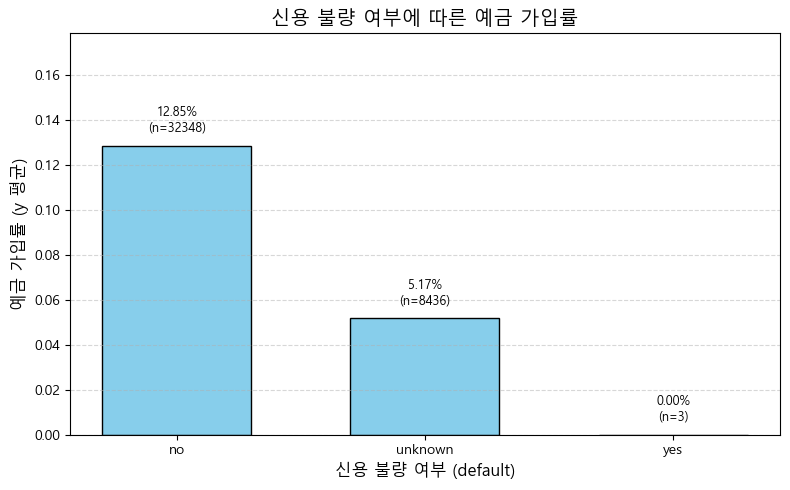

In [ ]:
# default별 가입률과 count 계산
default_grouped = bank_df.groupby('default')['y'].agg(['mean', 'count']).reset_index()

# 시각화
plt.figure(figsize=(8, 5))
bars = plt.bar(default_grouped['default'], default_grouped['mean'],
               color='skyblue', edgecolor='black', width=0.6)

# 축 라벨과 제목
plt.xlabel('신용 불량 여부 (default)', fontsize=12)
plt.ylabel('예금 가입률 (y 평균)', fontsize=12)
plt.title('신용 불량 여부에 따른 예금 가입률', fontsize=14)
plt.ylim(0, default_grouped['mean'].max() + 0.05)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 막대 위에 가입률 + count 표시
for bar, (value, count) in zip(bars, zip(default_grouped['mean'], default_grouped['count'])):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height + 0.005,
             f"{value:.2%}\n(n={count})",
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

- yes의 데이터수 3 거의 대부분이 no이고 unknown이 8435 -> 선형회귀 모델링에서는 컬럼을 삭제하는 편이 좋을수 있음


## housing

In [ ]:
bank_df['housing'].value_counts()

housing
yes        21376
no         18427
unknown      984
Name: count, dtype: int64

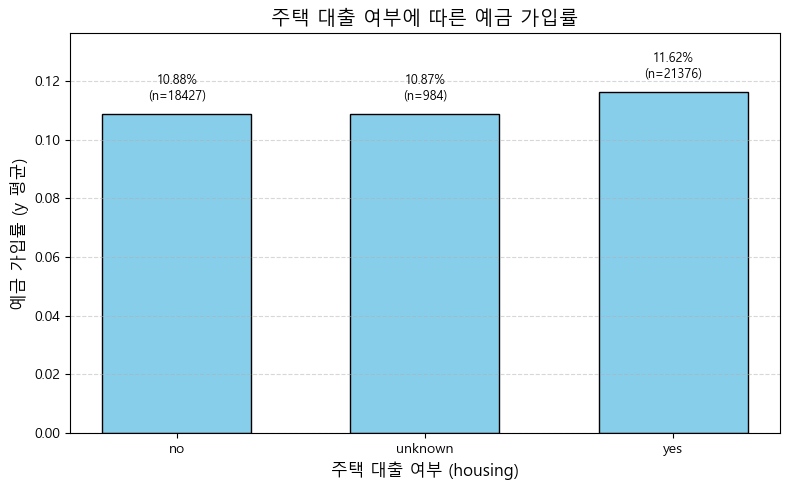

In [ ]:
# housing별 가입률과 count 계산
housing_grouped = bank_df.groupby('housing')['y'].agg(['mean', 'count']).reset_index()

# 시각화
plt.figure(figsize=(8, 5))
bars = plt.bar(housing_grouped['housing'], housing_grouped['mean'],
               color='skyblue', edgecolor='black', width=0.6)

# 축 라벨과 제목
plt.xlabel('주택 대출 여부 (housing)', fontsize=12)
plt.ylabel('예금 가입률 (y 평균)', fontsize=12)
plt.title('주택 대출 여부에 따른 예금 가입률', fontsize=14)
plt.ylim(0, housing_grouped['mean'].max() + 0.02)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 막대 위에 가입률 + count 표시
for bar, (value, count) in zip(bars, zip(housing_grouped['mean'], housing_grouped['count'])):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height + 0.004,
             f"{value:.2%}\n(n={count})",
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

- -> 모델링에 영향력이 약한 컬럼
- 남겨놓고 모델 학습 후 성능 비교해본 뒤 판단하는 걸 추천!

## loan

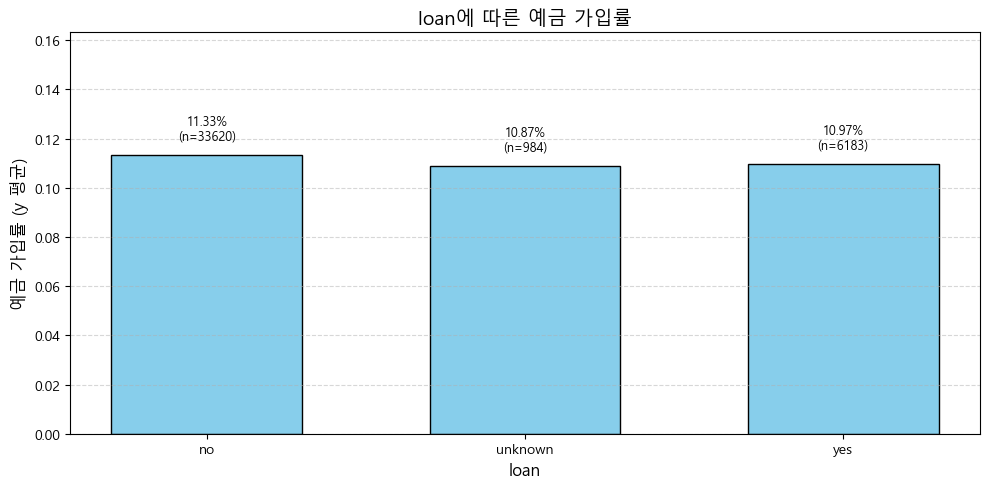

In [ ]:
plot_grouped_bar_with_count('loan')

- 모델링에 영향력이 약한 컬럼일것으로 생각됨

## contact

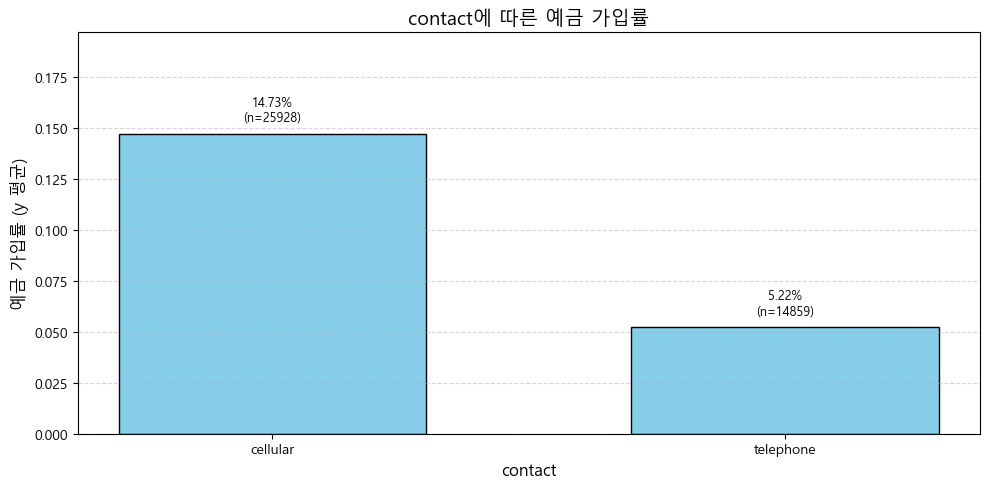

In [ ]:
plot_grouped_bar_with_count('contact')

1. 휴대폰(cellular)으로 연락한 고객의 가입률이 압도적으로 높음
가입률이 약 **14.73%**로, 유선전화의 2.8배 이상

이는 연락 방식이 예금 가입 성과에 직접적인 영향을 줄 수 있음을 시사

2. 유선전화(telephone)의 예금 가입률은 낮고, 전체 고객 수에서도 상대적으로 적음
유선전화는 과거 방식, 응답률/전환률이 떨어지는 경향

대부분의 고객이 휴대폰 중심의 소통 방식에 익숙하기 때문

## 'month'

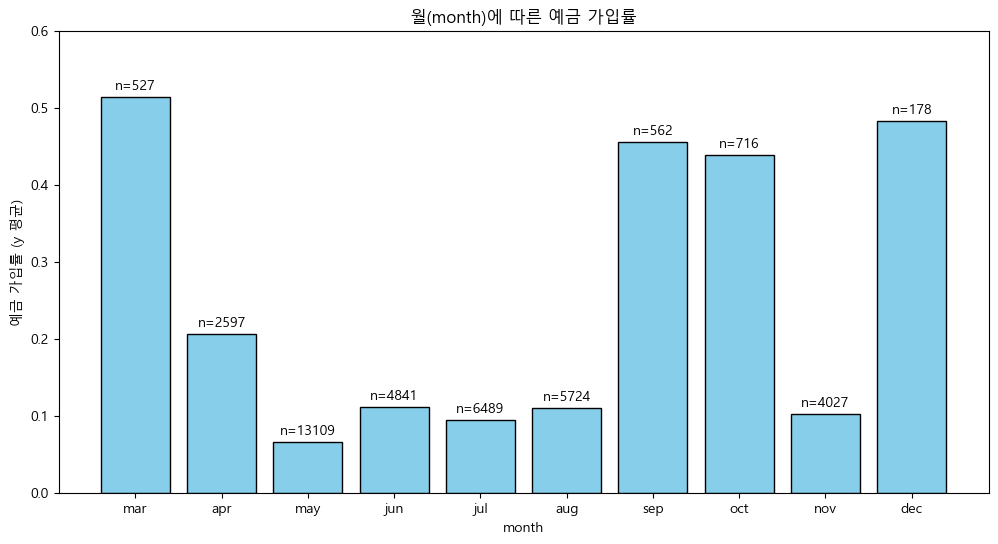

In [ ]:
month_order = ['mar', 'apr', 'may', 'jun',
               'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

grouped = bank_df.groupby('month').agg({'y': 'mean', 'month': 'count'}).rename(columns={'y': '가입률', 'month': '샘플수'})
grouped = grouped.loc[month_order]  # 순서 정렬

# 시각화
plt.figure(figsize=(12,6))
bars = plt.bar(grouped.index, grouped['가입률'], color='skyblue', edgecolor='black')

# 막대 위에 값 표시
for bar, count in zip(bars, grouped['샘플수']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"n={count}", ha='center')

plt.title("월(month)에 따른 예금 가입률")
plt.ylabel("예금 가입률 (y 평균)")
plt.xlabel("month")
plt.ylim(0, 0.6)
plt.show()

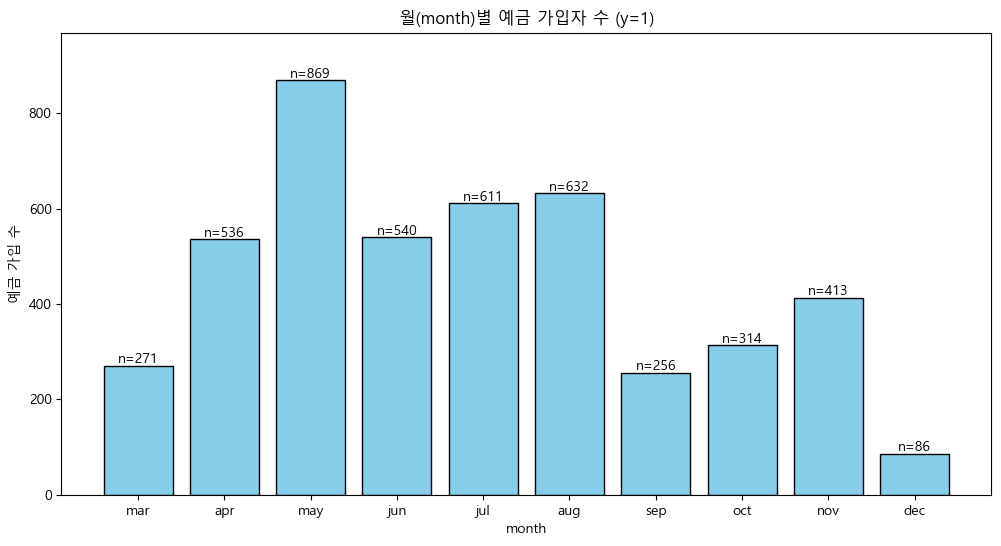

In [ ]:
# 'y' == 1인 데이터만 필터링
subscribed = bank_df[bank_df['y'] == 1]

# 월별 가입 수 계산
monthly_counts = subscribed['month'].value_counts().reindex(month_order)

# 그래프
plt.figure(figsize=(12,6))
bars = plt.bar(monthly_counts.index, monthly_counts.values, color='skyblue', edgecolor='black')

# 막대 위에 값 표시
for bar, count in zip(bars, monthly_counts.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, f"n={count}", ha='center')

plt.title("월(month)별 예금 가입자 수 (y=1)")
plt.xlabel("month")
plt.ylabel("예금 가입 수")
plt.ylim(0, monthly_counts.values.max() + 100)
plt.show()


1. 34분기(3월, 912월)의 예금 가입률이 월등히 높음
특히 **3월(Mar)**과 **12월(Dec)**은 각각 50%를 초과

가을~연말 시즌, 연초 금융 재정비 시기에 고객들의 예금 수요가 집중될 수 있음

반대로 5~7월은 가입률이 현저히 낮음 → 마케팅 비효율 가능성

2. 고객 수가 가장 많은 5월(May)은 오히려 가입률이 가장 낮음
13,619명의 고객에게 연락했지만 가입률은 6.48%

효율 대비 성과가 낮은 시기 → 자원 재분배 고려 필요

3. 12월, 3월, 9~10월은 가입률 높지만 고객 수는 상대적으로 적음
높은 전환률이지만 마케팅 규모가 작았을 가능성
→ 📈 해당 시기를 전략적 집중 시점으로 고려하면 좋음



## 'day_of_week'

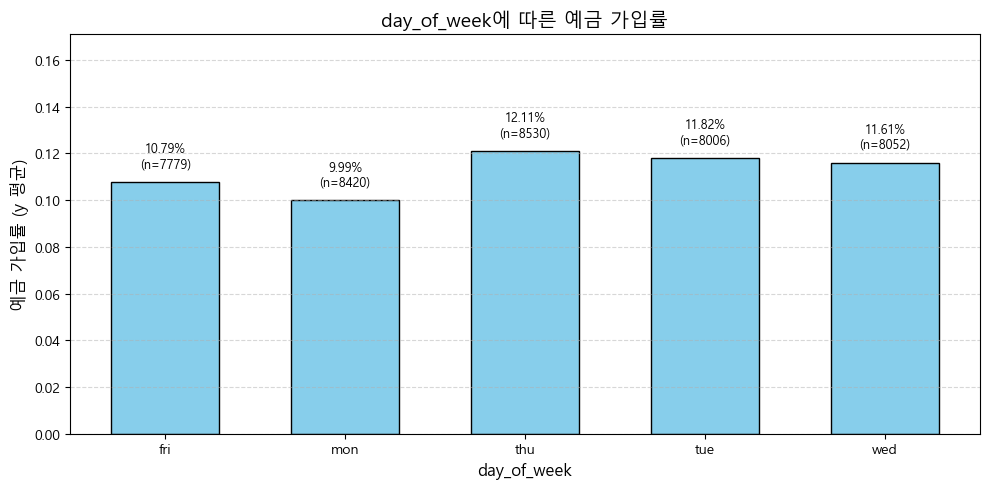

In [ ]:
plot_grouped_bar_with_count('day_of_week')

In [ ]:
bank_df['y'].mean()

0.11679133350528759

## poutcome

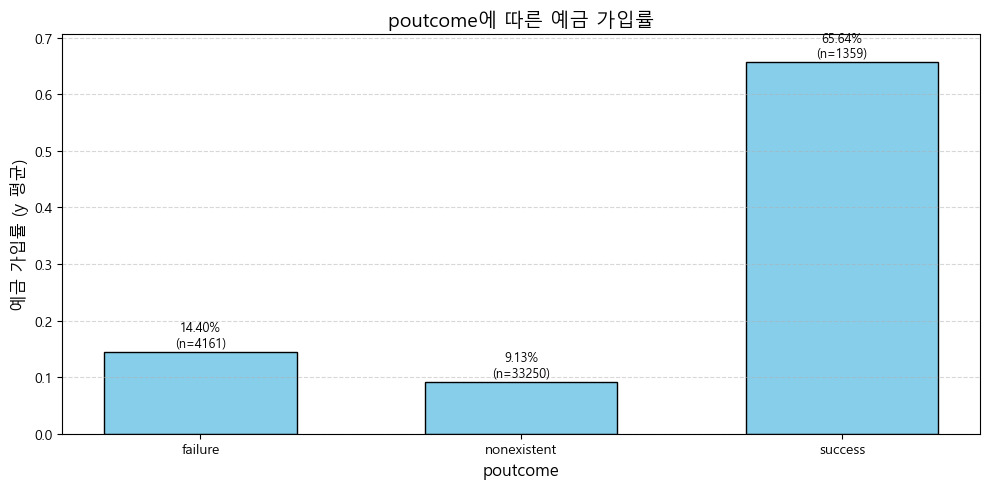

In [ ]:
plot_grouped_bar_with_count('poutcome')

# Feature Selection & One hot encoding

범주형 데이터 one hot Encoding

In [ ]:
categorical_cols = [
    'job', 'marital', 'education', 'default',
    'housing', 'loan', 'contact', 'month',
    'day_of_week', 'poutcome'
]

df_encoded_ = pd.get_dummies(bank_df, columns=categorical_cols, drop_first=True, dtype=int)

In [ ]:
df_encoded_.shape

(38770, 55)

In [ ]:
df_encoded_ = df_encoded_.drop(['euribor3m_bin', 'age_group'], axis=1)

KeyError: "['euribor3m_bin', 'age_group'] not found in axis"

In [ ]:
df_encoded_

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_contacted,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [ ]:
df_encoded_ = df_encoded_.drop(['duration', 'campaign','pdays'], axis=1)

KeyError: "['duration', 'campaign', 'pdays'] not found in axis"

In [ ]:
df_encoded_

,age,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,57,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,37,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,40,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,56,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41184,46,0,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41185,56,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41186,44,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


쓰래기값 확인

In [ ]:
df_encoded_[(df_encoded_['previous'] == 0) & (df_encoded_['pdays_contacted'] == 1)]

KeyError: 'pdays_contacted'

In [ ]:
df_encoded_ = df_encoded_.drop(['pdays_contacted'], axis=1)

In [ ]:
df_encoded_.head()

,age,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,57,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,37,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,40,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,56,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [ ]:
X = df_encoded_.drop('y', axis=1)
y = df_encoded_['y']

In [ ]:
X

,age,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,57,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,37,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,40,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,56,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41184,46,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41185,56,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41186,44,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 38770, dtype: int64

<Axes: >

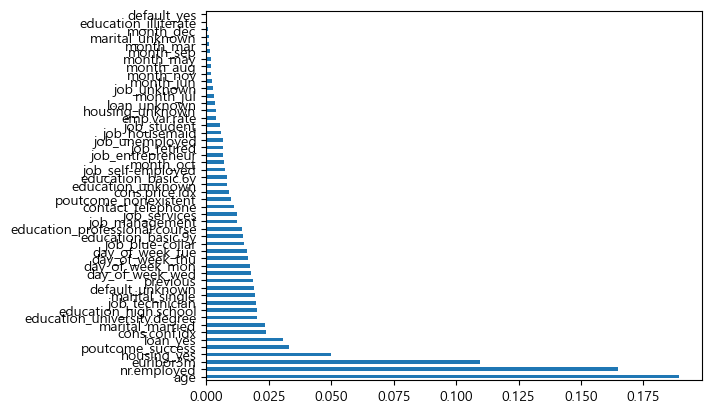

In [ ]:
# 랜덤 포레스트 feature importance

from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor()
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='barh')

C:\Users\82104\AppData\Local\Temp\ipykernel_13012\2077534319.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features, y=top_features.index, palette='Blues_d')


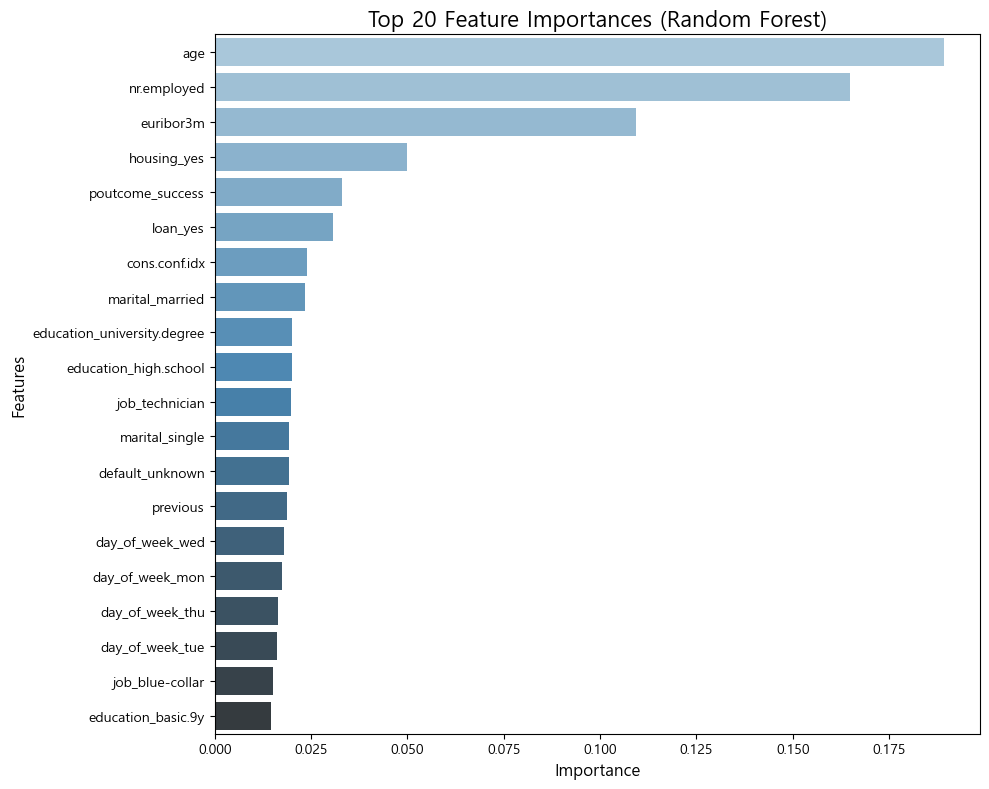

In [ ]:
# 상위 n개 변수만 보기 (예: 상위 20개)
top_n = 20
top_features = importances.sort_values(ascending=False).head(top_n)

# 시각화
plt.figure(figsize=(10, 8))
sns.barplot(x=top_features, y=top_features.index, palette='Blues_d')

plt.title("Top 20 Feature Importances (Random Forest)", fontsize=16)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
print(importances.sort_values(ascending=False).head(10))

duration                       0.340246
nr.employed                    0.156095
age                            0.088716
euribor3m                      0.080411
campaign                       0.031507
cons.conf.idx                  0.023984
pdays                          0.020951
housing_yes                    0.013230
cons.price.idx                 0.011760
education_university.degree    0.010794
dtype: float64


## 결정트리

In [ ]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
y_train = y_train.values.ravel()  # y가 Series 형태일 경우

# 모델 훈련
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# 예측
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# 정확도 계산
train_score = accuracy_score(y_train, train_predictions)
test_score = accuracy_score(y_test, test_predictions)

# 결과 출력
print(f"훈련 정확도 (Train Accuracy): {train_score:.4f}")
print(f"테스트 정확도 (Test Accuracy): {test_score:.4f}")

훈련 정확도 (Train Accuracy): 0.9148
테스트 정확도 (Test Accuracy): 0.9141


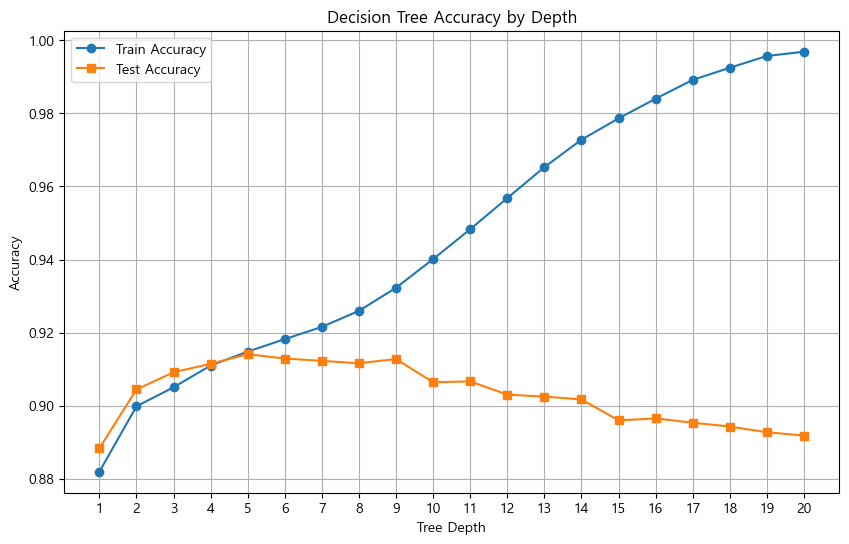

In [ ]:
# 깊이별 정확도 시각화

train_scores = []
test_scores = []
depth_range = range(1, 21)  # 1부터 20까지의 깊이 테스트

for depth in depth_range:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)

    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(depth_range, train_scores, marker='o', label='Train Accuracy')
plt.plot(depth_range, test_scores, marker='s', label='Test Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy by Depth')
plt.legend()
plt.grid(True)
plt.xticks(depth_range)
plt.show()

In [ ]:
# 랜덤 포레스트

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
y_train = y_train.values.ravel()

# 모델 정의 및 훈련
model = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# 예측
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# 정확도 계산
train_score = accuracy_score(y_train, train_preds)
test_score = accuracy_score(y_test, test_preds)

# 결과 출력
print(f"훈련 정확도 (Train Accuracy): {train_score:.4f}")
print(f"테스트 정확도 (Test Accuracy): {test_score:.4f}")

훈련 정확도 (Train Accuracy): 0.8959
테스트 정확도 (Test Accuracy): 0.8933


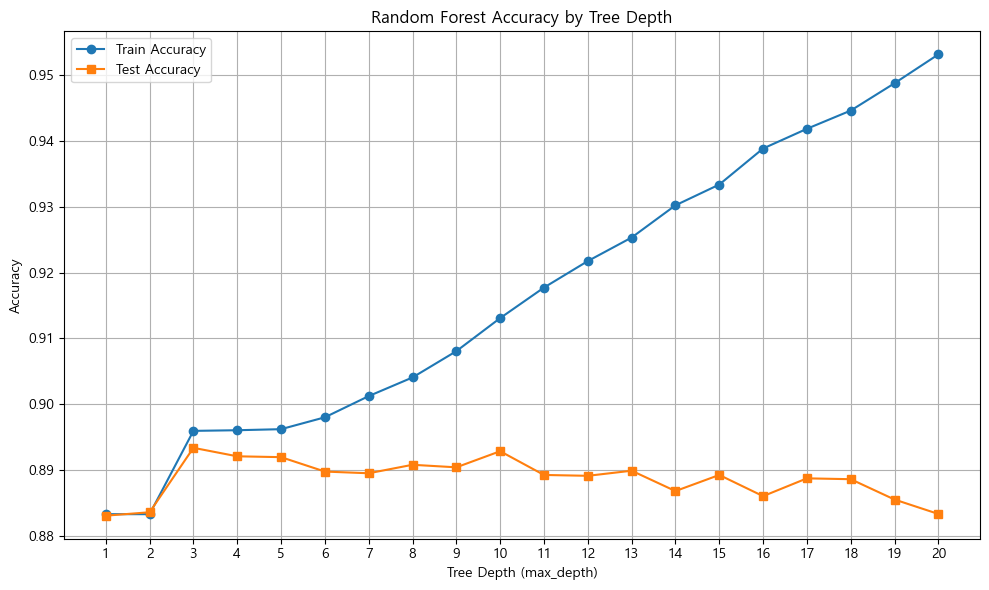

In [ ]:
train_scores = []
test_scores = []
depth_range = range(1, 21)  # max_depth 1부터 20까지 시도

for depth in depth_range:
    model = RandomForestClassifier(n_estimators=10, max_depth=depth, random_state=42)
    model.fit(X_train, y_train)

    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_scores.append(accuracy_score(y_train, train_preds))
    test_scores.append(accuracy_score(y_test, test_preds))

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(depth_range, train_scores, marker='o', label='Train Accuracy')
plt.plot(depth_range, test_scores, marker='s', label='Test Accuracy')
plt.xlabel('Tree Depth (max_depth)')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy by Tree Depth')
plt.legend()
plt.grid(True)
plt.xticks(depth_range)
plt.tight_layout()
plt.show()

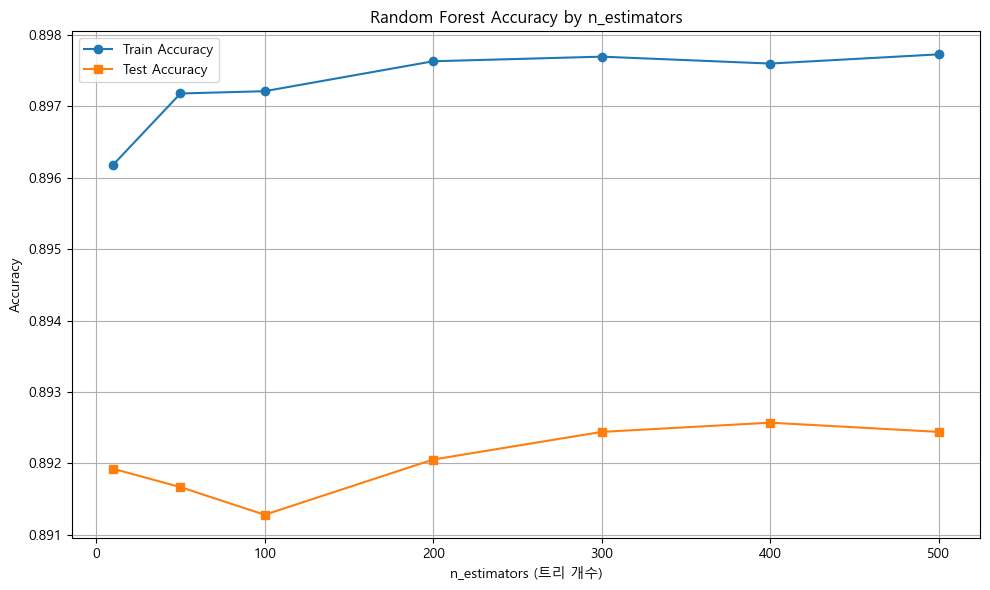

In [ ]:
train_scores = []
test_scores = []
n_estimators_list = [10, 50, 100, 200, 300, 400, 500]

for n in n_estimators_list:
    model = RandomForestClassifier(n_estimators=n, max_depth=5, random_state=42)
    model.fit(X_train, y_train)

    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_scores.append(accuracy_score(y_train, train_preds))
    test_scores.append(accuracy_score(y_test, test_preds))

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, train_scores, marker='o', label='Train Accuracy')
plt.plot(n_estimators_list, test_scores, marker='s', label='Test Accuracy')
plt.xlabel('n_estimators (트리 개수)')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy by n_estimators')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# 에다 부스트

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
y_train = y_train.values.ravel()

# 모델 정의 및 학습
model = AdaBoostClassifier(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

# 예측
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# 정확도 계산
train_score = accuracy_score(y_train, train_preds)
test_score = accuracy_score(y_test, test_preds)

# 결과 출력
print(f"훈련 정확도 (Train Accuracy): {train_score:.4f}")
print(f"테스트 정확도 (Test Accuracy): {test_score:.4f}")

C:\Users\82104\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


훈련 정확도 (Train Accuracy): 0.8988
테스트 정확도 (Test Accuracy): 0.8941


C:\Users\82104\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\82104\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\82104\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\82104\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\821

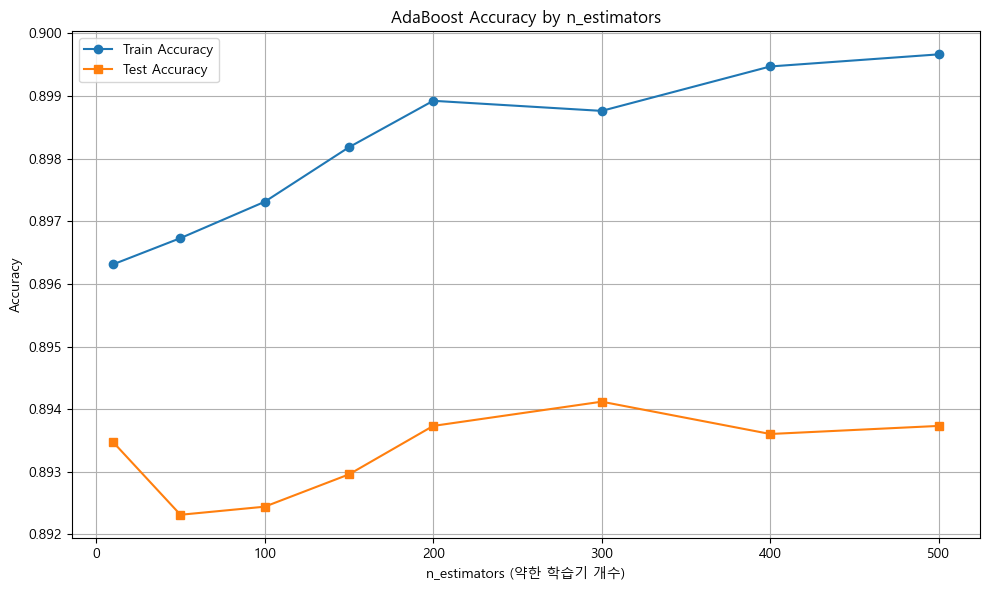

In [ ]:
train_scores = []
test_scores = []
n_values = [10, 50, 100, 150, 200, 300, 400, 500]

for n in n_values:
    model = AdaBoostClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_scores.append(accuracy_score(y_train, train_pred))
    test_scores.append(accuracy_score(y_test, test_pred))

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(n_values, train_scores, marker='o', label='Train Accuracy')
plt.plot(n_values, test_scores, marker='s', label='Test Accuracy')
plt.xlabel('n_estimators (약한 학습기 개수)')
plt.ylabel('Accuracy')
plt.title('AdaBoost Accuracy by n_estimators')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

이대석 학생의 은행 마케팅 데이터 분석 프로젝트는 전반적으로 매우 우수한 수준입니다. 특히 데이터 탐색 및 분석 부분에서 뛰어난 역량을 보여주었으며, 이를 통해 도출한 인사이트를 바탕으로 실질적인 마케팅 전략을 제안한 점이 돋보입니다.
EDA 과정에서 각 변수와 예금 가입률 간의 관계를 상세하게 분석하고, 이를 시각화하여 효과적으로 표현했습니다. 특히 직업군, 연령대, 교육 수준 등 다양한 인구통계학적 요소와 경제 지표들이 예금 가입에 미치는 영향을 심층적으로 분석한 점이 뛰어납니다.
모델링 부분에서는 결정 트리, 랜덤 포레스트, 에이다부스트 등 여러 알고리즘을 비교하고, 하이퍼파라미터 튜닝을 통해 성능을 향상시키려는 노력이 인상적입니다. 최종적으로 91.41%의 높은 테스트 정확도를 달성한 결정 트리 모델을 선택한 것은 합리적인 판단으로 보입니다.
개선할 수 있는 부분으로는, 학생 스스로 지적했듯이 노이즈가 될 수 있는 데이터 포인트들에 대한 더 적극적인 처리가 있었으면 좋았을 것입니다. 또한 정확도 외에 다양한 평가 지표를 활용하여 모델의 성능을 더 다각도로 평가하고, 코드 내 주석을 더 상세히 작성하여 문서화를 강화했다면 더욱 우수한 프로젝트가 되었을 것입니다.
종합적으로, 이대석 학생은 데이터 분석부터 모델링, 그리고 비즈니스 인사이트 도출까지 전 과정을 체계적으로 수행하여 매우 높은 수준의 프로젝트를 완성했습니다. 특히 실무에 적용 가능한 구체적인 마케팅 전략을 제안한 점은 이 프로젝트의 가장 큰 장점입니다.